# **Potensi Maksimal Penggunaan Metode Statistik dan Machine Learning dalam Penilaian Kredit.**

In [ ]:
!pip install ppscore

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
import plotly.express as px

### Load Dataset

### Dataset Train

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/application_train.csv'
df_train = pd.read_csv(path)
df_train.sample(5)

In [ ]:
df_train.shape

(307511, 122)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Dataset ini memiliki 307511 baris dan 122 kolom.

##### Data Preprocessing

##### Handling Missing Value

In [ ]:
miss_value=df_train.isnull().sum().sort_values(ascending=False)[:70]
miss_value

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
CNT_CHILDREN                     0
FLAG_DOCUMENT_8                  0
NAME_CONTRACT_TYPE               0
Length: 70, dtype: int64

In [ ]:
total_rows = len(df_train)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:70]
miss_percent

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
CNT_FAM_MEMBERS              0.00
DAYS_LAST_PHONE_CHANGE       0.00
CNT_CHILDREN                 0.00
FLAG_DOCUMENT_8              0.00
NAME_CONTRACT_TYPE           0.00
Length: 70, dtype: float64

Total missing value is 67 columns. Next, drop column if missing value percent > 60%.

In [ ]:
# threshold persentase missing value (50%)
threshold = 60

In [ ]:
columns_to_drop = miss_percent[miss_percent> threshold].index

In [ ]:
df_train_1 = df_train.drop(columns=columns_to_drop)

In [ ]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(49), int64(41), object(15)
memory usage: 246.3+ MB


In [ ]:
miss_value=df_train_1.isnull().sum().sort_values(ascending=False)[:28]
miss_value

LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_MODE              169682
ELEVATORS_MEDI                  163891
ELEVATORS_AVG                   163891
ELEVATORS_MODE                  163891
WALLSMATERIAL_MODE              156341
APARTMENTS_MODE                 156061
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
ENTRANCES_MODE                  154828
ENTRANCES_MEDI                  154828
ENTRANCES_AVG                   154828
LIVINGAREA_MEDI                 154350
LIVINGAREA_MODE                 154350
LIVINGAREA_AVG                  154350
HOUSETYPE_MODE                  154297
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI           

In [ ]:
total_rows = len(df_train_1)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:28]
miss_percent

LANDAREA_AVG                    59.38
LANDAREA_MODE                   59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_AVG               55.18
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_MODE              55.18
ELEVATORS_MEDI                  53.30
ELEVATORS_AVG                   53.30
ELEVATORS_MODE                  53.30
WALLSMATERIAL_MODE              50.84
APARTMENTS_MODE                 50.75
APARTMENTS_AVG                  50.75
APARTMENTS_MEDI                 50.75
ENTRANCES_MODE                  50.35
ENTRANCES_MEDI                  50.35
ENTRANCES_AVG                   50.35
LIVINGAREA_MEDI                 50.19
LIVINGAREA_MODE                 50.19
LIVINGAREA_AVG                  50.19
HOUSETYPE_MODE                  50.18
FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MO

In [ ]:
df_sample_train=df_train_1.sample(n=30000, random_state=42)

In [ ]:
df_sample_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
249923,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
158389,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
df_sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 245895 to 133397
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(49), int64(41), object(15)
memory usage: 24.3+ MB


### Dataset Bureau_Balance
Memberikan informasi bulanan tentang bagaimana pelanggan membayar kredit sebelumnya yang dilaporkan ke Biro Kredit.

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/bureau_balance.csv'
df_bureau_balance = pd.read_csv(path)
df_bureau_balance.sample(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26927052,5624975,-8,X
3351951,5901445,-48,X
16257048,6231996,-9,0
16161813,6269781,-72,C
16485602,5669731,-74,X


In [ ]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
miss_value=df_bureau_balance.isnull().sum().sort_values(ascending=False)
miss_value

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
aggregation_functions = {
    'MONTHS_BALANCE': 'mean'
}
df_bureau_balance_agg = df_bureau_balance.groupby('SK_ID_BUREAU').agg(aggregation_functions)

In [ ]:
df_bureau_balance_agg.head(5)

,MONTHS_BALANCE
SK_ID_BUREAU,
5001709,-48.0
5001710,-41.0
5001711,-1.5
5001712,-9.0
5001713,-10.5


Data bureau_balance di aggregrasi untuk feature month_balance berdasarkan feature unik SK_ID_BUREAU.

### Data Set Bureau

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/bureau.csv'
df_bureau = pd.read_csv(path)
df_bureau.sample(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1676926,454422,6652448,Closed,currency 1,-1496,0,-1433.0,-1433.0,NaN,0,13500.0,0.000,0.000,0.0,Credit card,-903,NaN
796872,283373,6034821,Closed,currency 1,-2381,0,31103.0,-2189.0,NaN,0,90000.0,0.000,NaN,0.0,Credit card,-2189,NaN
935756,224476,5445524,Active,currency 1,-204,0,759.0,NaN,NaN,0,225000.0,216040.500,0.000,0.0,Credit card,-25,NaN
1524598,329017,5357151,Active,currency 1,-2452,0,-302.0,NaN,0.0,0,90000.0,-23.175,45023.175,0.0,Credit card,-626,NaN
1113813,159861,6122780,Closed,currency 1,-76,0,-69.0,-69.0,NaN,0,13500.0,0.000,0.000,0.0,Consumer credit,-60,0.0


In [ ]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
miss_value=df_bureau.isnull().sum().sort_values(ascending=False)[:10]
miss_value

AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
dtype: int64

In [ ]:
total_rows = len(df_bureau)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:28]
miss_percent

AMT_ANNUITY               71.47
AMT_CREDIT_MAX_OVERDUE    65.51
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_DEBT       15.01
DAYS_CREDIT_ENDDATE        6.15
AMT_CREDIT_SUM             0.00
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
dtype: float64

Total missing value is 7 columns, where columns AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE have missing value percent more than 60%. The next step is to delete the column.

In [ ]:
column_to_drop = ['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE']
df_bureau_1 = df_bureau.drop(column_to_drop, axis=1)

In [ ]:
miss_value=df_bureau_1.isnull().sum().sort_values(ascending=False)[:10]
miss_value

DAYS_ENDDATE_FACT       633653
AMT_CREDIT_SUM_LIMIT    591780
AMT_CREDIT_SUM_DEBT     257669
DAYS_CREDIT_ENDDATE     105553
AMT_CREDIT_SUM              13
SK_ID_CURR                   0
SK_ID_BUREAU                 0
CREDIT_ACTIVE                0
CREDIT_CURRENCY              0
DAYS_CREDIT                  0
dtype: int64

### JOIN DATA BUREAU BALANCE AND BUREAU
dilakukan join data berdasarkan SK_ID_BUREAU, kemudian di aggregrasi untuk rata-ratanya terhadap SK_ID_CURR supaya SK_ID_CURR bernilai unique.


In [ ]:
df_bureau_join = pd.merge(df_bureau, df_bureau_balance_agg , how='left', on='SK_ID_BUREAU')

In [ ]:
df_bureau_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE          float64
dtypes: float64(9), int64(6), object(3)
memory usage: 248.8+ MB


In [ ]:
aggregation_functions = {
    'SK_ID_BUREAU': 'count',
    'AMT_CREDIT_SUM':'mean',
    'AMT_CREDIT_SUM_DEBT':'mean',
    'AMT_CREDIT_SUM_OVERDUE':'mean',
    'MONTHS_BALANCE': 'mean'
}
df_bureau_join_agg = df_bureau_join.groupby('SK_ID_CURR').agg(aggregation_functions).reset_index()

# Rename the 'SK_ID_BUREAU' column
df_bureau_join_agg = df_bureau_join_agg.rename(columns={'SK_ID_BUREAU': 'TOTAL_SK_ID_BUREAU'})
df_bureau_join_agg = df_bureau_join_agg.rename(columns={'MONTHS_BALANCE': 'AVG_MONTHS_BALANCE_BUREAU'})


In [ ]:
df_bureau_join_agg.head(5)

,SK_ID_CURR,TOTAL_SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AVG_MONTHS_BALANCE_BUREAU
0,100001,7,207623.571429,85240.928571,0.0,-11.785714
1,100002,8,108131.945625,49156.200000,0.0,-21.875000
2,100003,4,254350.125000,0.000000,0.0,NaN
3,100004,2,94518.900000,0.000000,0.0,NaN
4,100005,3,219042.000000,189469.500000,0.0,-3.000000


Dari data bureau yang telah di join, kita dapat mengetahui informasi tentang
- jumlah kredit sebelumnya yang dilaporkan oleh klien ke Biro Kredit sebelum tanggal pengajuan pinjaman.
- Jumlah kredit saat ini untuk kredit Biro Kredit
- Hutang saat ini pada kredit Biro Kredit
- Jumlah saat ini yang telah jatuh tempo pada kredit Biro Kredit


### Dataset POS_CASH_balance

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/POS_CASH_balance.csv'
df_pos_cash = pd.read_csv(path)
df_pos_cash.sample(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2673521,1962095,221050,-19,24.0,17.0,Active,0,0
356466,1880412,412304,-10,48.0,36.0,Active,0,0
4366103,2503021,289235,-15,24.0,17.0,Active,0,0
2532270,1125153,119288,-20,12.0,6.0,Active,0,0
851151,1289814,198992,-63,12.0,5.0,Active,0,0


In [ ]:
df_pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
miss_value=df_pos_cash.isnull().sum().sort_values(ascending=False)
miss_value

CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071
SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
aggregation_functions = {
    'MONTHS_BALANCE': 'mean',
    'CNT_INSTALMENT_FUTURE':'mean',
    'SK_DPD':'mean',
    'SK_DPD_DEF':'mean'
}
df_pos_cash_agg = df_pos_cash.groupby('SK_ID_PREV').agg(aggregation_functions).reset_index()
df_pos_cash_agg = df_pos_cash_agg.rename(columns={'MONTHS_BALANCE': 'AVG_MONTHS_BALANCE_POS_CASH'})

In [ ]:
df_pos_cash_agg.head(5)

,SK_ID_PREV,AVG_MONTHS_BALANCE_POS_CASH,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,1000001,-9.0,7.666667,0.0,0.0
1,1000002,-52.0,2.000000,0.0,0.0
2,1000003,-2.5,10.500000,0.0,0.0
3,1000004,-25.5,6.125000,0.0,0.0
4,1000005,-51.0,5.000000,0.0,0.0


Dari data ini akan di dapat infomasi mengenai
- Cicilan tersisa untuk dibayar pada kredit sebelumnya
- DPD (hari lewat jatuh tempo) pada bulan kredit sebelumnya
- DPD selama bulan tersebut dengan toleransi (utang dengan jumlah pinjaman rendah diabaikan) dari kredit sebelumnya



### Dataset credit_card_balance

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/credit_card_balance.csv'
df_credit_card = pd.read_csv(path)
df_credit_card.sample(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2693860,1556216,280205,-21,0.00,315000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,17.0,Active,0,0
1977165,1444783,144516,-14,0.00,427500,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,17.0,Active,0,0
3213532,2506143,150955,-77,0.00,90000,NaN,0.0,NaN,NaN,NaN,...,0.000,0.000,NaN,0,NaN,NaN,NaN,Active,0,0
641558,1800529,303616,-8,0.00,0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,18.0,Active,0,0
1417557,1465484,365408,-4,46894.95,90000,0.0,0.0,0.0,0.0,2381.985,...,46106.775,46106.775,0.0,0,0.0,0.0,2.0,Active,0,0


In [ ]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
miss_value=df_credit_card.isnull().sum().sort_values(ascending=False)[:12]
miss_value

AMT_PAYMENT_CURRENT           767988
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236
SK_ID_PREV                         0
AMT_TOTAL_RECEIVABLE               0
SK_DPD                             0
dtype: int64

In [ ]:
total_rows = len(df_credit_card)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:28]
miss_percent

AMT_PAYMENT_CURRENT           20.00
AMT_DRAWINGS_ATM_CURRENT      19.52
CNT_DRAWINGS_POS_CURRENT      19.52
AMT_DRAWINGS_OTHER_CURRENT    19.52
AMT_DRAWINGS_POS_CURRENT      19.52
CNT_DRAWINGS_OTHER_CURRENT    19.52
CNT_DRAWINGS_ATM_CURRENT      19.52
CNT_INSTALMENT_MATURE_CUM      7.95
AMT_INST_MIN_REGULARITY        7.95
SK_ID_PREV                     0.00
AMT_TOTAL_RECEIVABLE           0.00
SK_DPD                         0.00
dtype: float64

In [ ]:
aggregation_functions = {
    'AMT_PAYMENT_TOTAL_CURRENT':'mean',
    'AMT_TOTAL_RECEIVABLE':'mean',
    'MONTHS_BALANCE': 'mean',
}
df_credit_card_agg = df_credit_card.groupby('SK_ID_PREV').agg(aggregation_functions).reset_index()
df_credit_card_agg = df_credit_card_agg.rename(columns={'MONTHS_BALANCE': 'AVG_MONTHS_BALANCE_CREDIT_CARD'})

In [ ]:
df_credit_card_agg.head(5)

,SK_ID_PREV,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AVG_MONTHS_BALANCE_CREDIT_CARD
0,1000018,5541.750000,73602.585000,-4.0
1,1000030,2657.947500,55935.376875,-4.5
2,1000031,22157.443125,52099.970625,-8.5
3,1000035,0.000000,0.000000,-4.0
4,1000077,0.000000,0.000000,-7.0


### Dataset installments_payments


In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/installments_payments.csv'
df_instal_pay = pd.read_csv(path)
df_instal_pay.sample(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
490102,2451893,143845,1.0,12,-130.0,-140.0,9179.370,9179.37
7715722,1845151,355554,0.0,31,-561.0,-580.0,1154.115,1081.44
6698482,1240743,272478,2.0,15,-118.0,-150.0,7875.090,7875.09
10131583,2652032,310516,0.0,1,-952.0,-952.0,9000.000,9000.00
8994849,1036225,387743,6.0,3,-569.0,-570.0,18115.920,56250.00


In [ ]:
df_instal_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
miss_value=df_instal_pay.isnull().sum().sort_values(ascending=False)[:5]
miss_value

DAYS_ENTRY_PAYMENT        2905
AMT_PAYMENT               2905
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
dtype: int64

In [ ]:
aggregation_functions = {
    'AMT_INSTALMENT': 'mean'
}
df_instal_pay_agg = df_instal_pay.groupby('SK_ID_PREV').agg(aggregation_functions).reset_index()
df_instal_pay_agg = df_instal_pay_agg.rename(columns={'AMT_INSTALMENT ': 'AVG_AMT_INSTALMENT'})

In [ ]:
df_instal_pay_agg.head(5)

,SK_ID_PREV,AMT_INSTALMENT
0,1000001,34221.712500
1,1000002,9308.891250
2,1000003,4951.350000
3,1000004,4789.022143
4,1000005,14703.210000


### JOIN INSTALMENTs PAYMENT WIHT CREDIT CASH

In [ ]:
df_credit_payment_join = pd.merge(df_instal_pay_agg, df_credit_card_agg, how='outer', on='SK_ID_PREV')

In [ ]:
df_credit_payment_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029593 entries, 0 to 1029592
Data columns (total 5 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   SK_ID_PREV                      1029593 non-null  int64  
 1   AMT_INSTALMENT                  997752 non-null   float64
 2   AMT_PAYMENT_TOTAL_CURRENT       104307 non-null   float64
 3   AMT_TOTAL_RECEIVABLE            104307 non-null   float64
 4   AVG_MONTHS_BALANCE_CREDIT_CARD  104307 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 47.1 MB


In [ ]:
df_credit_payment_join.head(5)

,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AVG_MONTHS_BALANCE_CREDIT_CARD
0,1000001,34221.712500,NaN,NaN,NaN
1,1000002,9308.891250,NaN,NaN,NaN
2,1000003,4951.350000,NaN,NaN,NaN
3,1000004,4789.022143,NaN,NaN,NaN
4,1000005,14703.210000,NaN,NaN,NaN


### previous_application

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/previous_application.csv'
pd.set_option('display.max_columns',None)
df_previous_app = pd.read_csv(path)
df_previous_app.sample(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1493808,2268989,391344,Revolving loans,9000.000,180000.0,180000.0,NaN,180000.0,THURSDAY,8,Y,1,NaN,NaN,NaN,XAP,Refused,-175,XNA,HC,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN
564046,2467967,428100,Consumer loans,4913.505,49140.0,44226.0,4914.0,49140.0,TUESDAY,15,Y,1,0.108909,NaN,NaN,XAP,Approved,-2597,XNA,XAP,"Spouse, partner",New,Consumer Electronics,POS,XNA,Stone,180,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2556.0,-2286.0,-2286.0,-2270.0,0.0
585413,2249045,166333,Cash loans,17898.390,225000.0,254700.0,NaN,225000.0,WEDNESDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-1162,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high,365243.0,-1132.0,-442.0,-592.0,-584.0,1.0
72456,2576920,325159,Cash loans,44900.730,720000.0,876816.0,NaN,720000.0,TUESDAY,2,Y,1,NaN,NaN,NaN,XNA,Refused,-30,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,36.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,NaN
1229163,2419008,386039,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,6,Y,1,NaN,NaN,NaN,XNA,Refused,-189,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
miss_value=df_previous_app.isnull().sum().sort_values(ascending=False)[:20]
miss_value

RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
NFLAG_INSURED_ON_APPROVAL     673065
DAYS_TERMINATION              673065
DAYS_LAST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_FIRST_DUE                673065
DAYS_FIRST_DRAWING            673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
NAME_YIELD_GROUP                   0
NAME_PORTFOLIO                     0
NAME_SELLER_INDUSTRY               0
SELLERPLACE_AREA                   0
dtype: int64

In [ ]:
total_rows = len(df_previous_app)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:20]
miss_percent

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_YIELD_GROUP              0.00
NAME_PORTFOLIO                0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
dtype: float64

Total missing value is 16 columns, where columns RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY, AMT_DOWN_PAYMENT, and RATE_DOWN_PAYMENT have missing value percent more than 60%. The next step is to delete the column.


In [ ]:
column_to_drop = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY']
df_previous_app_1= df_previous_app.drop(column_to_drop, axis=1)

In [ ]:
miss_value=df_previous_app_1.isnull().sum().sort_values(ascending=False)[:20]
miss_value

AMT_DOWN_PAYMENT             895844
RATE_DOWN_PAYMENT            895844
NAME_TYPE_SUITE              820405
NFLAG_INSURED_ON_APPROVAL    673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_FIRST_DRAWING           673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION             673065
AMT_GOODS_PRICE              385515
AMT_ANNUITY                  372235
CNT_PAYMENT                  372230
PRODUCT_COMBINATION             346
AMT_CREDIT                        1
NAME_PORTFOLIO                    0
NAME_YIELD_GROUP                  0
NAME_SELLER_INDUSTRY              0
SELLERPLACE_AREA                  0
CHANNEL_TYPE                      0
NAME_PRODUCT_TYPE                 0
dtype: int64

### JOIN PREVIOUS ke CREDIT PATMENT

In [ ]:
df_prev= pd.merge(df_previous_app_1, df_credit_payment_join, how='outer', on='SK_ID_PREV')

In [ ]:
df_prev_2=pd.merge(df_prev, df_pos_cash_agg, how='outer', on='SK_ID_PREV')

In [ ]:
pd.set_option('display.max_columns',None)
df_prev_2.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_INSTALMENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AVG_MONTHS_BALANCE_CREDIT_CARD,AVG_MONTHS_BALANCE_POS_CASH,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,17284.275000,NaN,NaN,NaN,-1.5,6.000000,0.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,25188.615000,NaN,NaN,NaN,-4.0,34.000000,0.0,0.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,15060.735000,NaN,NaN,NaN,-5.5,7.500000,0.0,0.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,51193.943182,NaN,NaN,NaN,-11.5,6.416667,0.0,0.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define aggregation functions
aggregation_functions = {
    'SK_ID_PREV':'count',
    'AMT_PAYMENT_TOTAL_CURRENT':'mean',
    'AMT_TOTAL_RECEIVABLE':'mean',
    'AMT_INSTALMENT': 'mean',
    'SK_DPD':'mean',
    'AVG_MONTHS_BALANCE_CREDIT_CARD': 'mean'
}

# Perform aggregation
df_prev_agg = df_prev_2.groupby('SK_ID_CURR').agg(aggregation_functions).reset_index()
df_prev_agg = df_prev_agg.rename(columns={'SK_ID_PREV': 'TOTAL_PREV_APP'})

In [ ]:
df_prev_agg.head(5)

,SK_ID_CURR,TOTAL_PREV_APP,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AMT_INSTALMENT,SK_DPD,AVG_MONTHS_BALANCE_CREDIT_CARD
0,100001.0,1,NaN,NaN,7312.725000,0.0,NaN
1,100002.0,1,NaN,NaN,11559.247105,0.0,NaN
2,100003.0,3,NaN,NaN,78558.479286,0.0,NaN
3,100004.0,1,NaN,NaN,7096.155000,0.0,NaN
4,100005.0,2,NaN,NaN,6240.205000,0.0,NaN


dari data tersebut dapat memberikan informasi mengenai
- Berapa total yang dibayar klien selama bulan tersebut pada kredit sebelumnya
- Berapa jumlah angsuran yang ditentukan dari kredit sebelumnya pada angsuran ini
- DPD mengukur jumlah hari keterlambatan pembayaran pinjaman atau kewajiban finansial setelah jatuh tempo.
- Jumlah kredit akhir pada permohonan sebelumnya. Ini berbeda dari AMT_APPLICATION karena AMT_APPLICATION adalah jumlah yang awalnya diajukan oleh klien, namun selama proses persetujuan kami dia bisa saja menerima jumlah yang berbeda - AMT_CREDIT


### Dataset Test

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/application_test.csv'
df_test = pd.read_csv(path)
df_test.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38386,381764,Cash loans,M,N,N,0,90000.0,296280.0,15255.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
28247,306069,Cash loans,F,Y,Y,0,135000.0,451102.5,23161.5,337500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
19,100141,Cash loans,F,Y,Y,0,175500.0,478498.5,46741.5,454500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
43433,416264,Cash loans,M,N,Y,1,225000.0,337500.0,26248.5,337500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
14474,204318,Cash loans,M,Y,N,1,135000.0,877500.0,28435.5,877500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## JOIN DATASET TEST FINAL

In [ ]:
df_merged_test = pd.merge(df_test, df_bureau_join_agg, how ='left', on='SK_ID_CURR')

NameError: ignored

In [ ]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 126 entries, SK_ID_CURR to AVG_MONTHS_BALANCE_BUREAU
dtypes: float64(70), int64(40), object(16)
memory usage: 47.2+ MB


In [ ]:
df_final_test = pd.merge(df_merged_test, df_prev_agg, how='left', on='SK_ID_CURR')

In [ ]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 132 entries, SK_ID_CURR to AVG_MONTHS_BALANCE_CREDIT_CARD
dtypes: float64(76), int64(40), object(16)
memory usage: 49.5+ MB


In [ ]:
df_final_test.to_csv('data_final_test.csv', index=False)

### LOAD DATA TEST FINAL

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/data_final_test.csv'
df_test_ok = pd.read_csv(path)
df_test_ok.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AMT_INSTALMENT,SK_DPD,AVG_MONTHS_BALANCE_CREDIT_CARD
37366,373472,Cash loans,F,N,Y,1,157500.0,273708.0,30955.5,225000.0,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,16410.489243,0.125,NaN
29733,316382,Cash loans,F,N,N,0,450000.0,450000.0,43839.0,450000.0,...,2.601794e+06,1.647540e+05,0.0,-21.666667,4.0,45260.55587,371457.467609,31861.687800,0.520,-12.0
21807,258193,Cash loans,M,Y,Y,0,112500.0,172021.5,17757.0,148500.0,...,3.998008e+05,2.135115e+05,0.0,-16.750000,3.0,NaN,NaN,19934.651250,0.000,NaN
19017,238222,Cash loans,F,Y,N,0,225000.0,78192.0,8338.5,67500.0,...,1.309500e+06,1.024814e+06,0.0,-9.500000,9.0,30193.75000,207975.142500,20684.475482,0.000,-19.5
45561,433296,Cash loans,F,N,Y,2,69750.0,220536.0,9400.5,135000.0,...,7.920947e+04,2.287677e+04,0.0,-16.541667,2.0,NaN,NaN,8331.444375,0.000,NaN


## JOIN DATASET FINAL TRAIN


#### Join Data Sample Train with Data Bureau
df_train with
df_bureau_join_agg

In [ ]:
df_merged = pd.merge(df_train, df_bureau_join_agg, how ='left', on='SK_ID_CURR')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 127 entries, SK_ID_CURR to AVG_MONTHS_BALANCE_BUREAU
dtypes: float64(70), int64(41), object(16)
memory usage: 300.3+ MB


#### Join again with Prev Application
df_prev_agg

In [ ]:
df_final = pd.merge(df_merged, df_prev_agg, how='left', on='SK_ID_CURR')

In [ ]:
df_final.to_csv('data_final.csv', index=False)

## Load Data Train Final

In [ ]:
path = '/content/drive/MyDrive/RAKAMIN ACADEMY BATCH 33/PBI 2 - Home Credit/DATASET/data_final.csv'
df_final_ok = pd.read_csv(path)
df_final_ok.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AMT_INSTALMENT,SK_DPD,AVG_MONTHS_BALANCE_CREDIT_CARD
177340,305511,0,Cash loans,F,N,Y,0,157500.0,543735.0,23166.0,...,1.170257e+05,14923.445,0.0,NaN,5.0,NaN,NaN,32990.508389,0.0,NaN
19280,122494,0,Cash loans,F,Y,N,1,90000.0,225000.0,24363.0,...,1.770935e+05,115370.250,0.0,NaN,6.0,NaN,NaN,37730.698750,0.0,NaN
141768,264376,0,Cash loans,F,N,Y,0,135000.0,431280.0,22149.0,...,3.320618e+05,269507.250,0.0,-12.500000,1.0,NaN,NaN,6639.023571,0.0,NaN
204181,336712,0,Cash loans,F,N,Y,0,225000.0,286974.0,22338.0,...,1.004762e+06,736475.250,0.0,-16.416667,5.0,NaN,NaN,14149.794102,0.0,NaN
270231,413190,0,Cash loans,M,N,Y,0,40050.0,215640.0,13158.0,...,1.651500e+06,950478.750,0.0,NaN,2.0,NaN,NaN,13586.773846,0.0,NaN


In [ ]:
miss_value=df_final_ok.isnull().sum().sort_values(ascending=False)[:60]
miss_value

AVG_MONTHS_BALANCE_CREDIT_CARD    229577
AMT_TOTAL_RECEIVABLE              229577
AMT_PAYMENT_TOTAL_CURRENT         229577
AVG_MONTHS_BALANCE_BUREAU         215280
COMMONAREA_AVG                    214865
COMMONAREA_MEDI                   214865
COMMONAREA_MODE                   214865
NONLIVINGAPARTMENTS_MEDI          213514
NONLIVINGAPARTMENTS_MODE          213514
NONLIVINGAPARTMENTS_AVG           213514
FONDKAPREMONT_MODE                210295
LIVINGAPARTMENTS_MEDI             210199
LIVINGAPARTMENTS_MODE             210199
LIVINGAPARTMENTS_AVG              210199
FLOORSMIN_MEDI                    208642
FLOORSMIN_AVG                     208642
FLOORSMIN_MODE                    208642
YEARS_BUILD_MEDI                  204488
YEARS_BUILD_MODE                  204488
YEARS_BUILD_AVG                   204488
OWN_CAR_AGE                       202929
LANDAREA_MEDI                     182590
LANDAREA_MODE                     182590
LANDAREA_AVG                      182590
BASEMENTAREA_MED

### Handling Missing Value Data Train dan Test

Mengisi feature ini dengan nilai 0, dengan asumsi bahwa, peminja tidka memiliki riwayat peminjaman sebelumnya.


- TOTAL_SK_ID_BUREAU
- AMT_CREDIT_SUM
- AMT_CREDIT_SUM_DEBT
- AMT_CREDIT_SUM_OVERDUE
- AVG_MONTHS_BALANCE_BUREAU
- AMT_REQ_CREDIT_BUREAU_YEAR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_HOUR
- DAYS_LAST_PHONE_CHANGE


In [ ]:
columns_to_fill_1 = ['TOTAL_SK_ID_BUREAU', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE','AVG_MONTHS_BALANCE_BUREAU',
                'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                ]
#Handling in Train
df_final_ok[columns_to_fill_1] = df_final_ok[columns_to_fill_1].fillna(0)

#Handling in Test
df_test_ok[columns_to_fill_1] = df_test_ok[columns_to_fill_1].fillna(0)

Mengisi nilai feature berikut ini dengan nilai 0, dengan asumsi bahwa peminjam tidak memiliki riwayat penggunaan aplikasi sebelumnya.
- TOTAL_PREV_APP
- AMT_CREDIT_y
- AMT_PAYMENT_TOTAL_CURRENT
- AMT_TOTAL_RECEIVABLE
- AMT_INSTALMENT
- AVG_MONTHS_BALANCE_CREDIT_CARD
- DAYS_LAST_PHONE_CHANGE


In [ ]:
columns_to_fill_2 = ['TOTAL_PREV_APP', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'AMT_INSTALMENT', 'AVG_MONTHS_BALANCE_CREDIT_CARD','DAYS_LAST_PHONE_CHANGE','SK_DPD']

#Handling in Train
df_final_ok[columns_to_fill_2] = df_final_ok[columns_to_fill_2].fillna(0)

#Handling in Test
df_test_ok[columns_to_fill_2] = df_test_ok[columns_to_fill_2].fillna(0)

In [ ]:
#Cek in Train
miss_value=df_final_ok.isnull().sum().sort_values(ascending=False)[:70]
miss_value

COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
SK_DPD                           0
AMT_CREDIT_SUM_OVERDUE           0
AMT_CREDIT_SUM                   0
FLAG_DOCUMENT_4                  0
TOTAL_SK_ID_BUREAU               0
Length: 70, dtype: int64

In [ ]:
total_rows = len(df_final_ok)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:70]
miss_percent

COMMONAREA_AVG              69.87
COMMONAREA_MEDI             69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_MODE    69.43
                            ...  
SK_DPD                       0.00
AMT_CREDIT_SUM_OVERDUE       0.00
AMT_CREDIT_SUM               0.00
FLAG_DOCUMENT_4              0.00
TOTAL_SK_ID_BUREAU           0.00
Length: 70, dtype: float64

In [ ]:
#Cek in est
miss_value=df_test_ok.isnull().sum().sort_values(ascending=False)[:70]
miss_value

COMMONAREA_AVG              33495
COMMONAREA_MEDI             33495
COMMONAREA_MODE             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
                            ...  
AMT_INSTALMENT                  0
FLAG_DOCUMENT_13                0
SK_DPD                          0
FLAG_DOCUMENT_14                0
FLAG_DOCUMENT_15                0
Length: 70, dtype: int64

In [ ]:
total_rows = len(df_test_ok)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:70]
miss_percent

COMMONAREA_AVG              68.72
COMMONAREA_MEDI             68.72
COMMONAREA_MODE             68.72
NONLIVINGAPARTMENTS_AVG     68.41
NONLIVINGAPARTMENTS_MODE    68.41
                            ...  
AMT_INSTALMENT               0.00
FLAG_DOCUMENT_13             0.00
SK_DPD                       0.00
FLAG_DOCUMENT_14             0.00
FLAG_DOCUMENT_15             0.00
Length: 70, dtype: float64

Masih terdapat 67 feature yang memiliki missing value, selanjutnya dilakukan drop feature missing value, pada kolom yang memiliki percent missing value > 60%


In [ ]:
# threshold persentase missing value (50%)
threshold = 60

In [ ]:
columns_to_drop = miss_percent[miss_percent> threshold].index

In [ ]:
#Handling in Train
df_final_ok= df_final_ok.drop(columns=columns_to_drop)

In [ ]:
#Handling in Test
df_test_ok= df_test_ok.drop(columns=columns_to_drop)

Mengising Nilai Missing value dengan median untuk feature numerik dan nilai median untuk feature kategorik.

In [ ]:
numerical_columns = df_final_ok.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
       'AVG_MONTHS_BALANCE_BUREAU', 'TOTAL_PREV_APP',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_TOTAL_RECEIVABLE', 'AMT_INSTALMENT',
       'SK_DPD', 'AVG_MONTHS_BALANCE_CREDIT_CARD'],
      dtype='object', length=101)

In [ ]:
#Handling Numeric Feature
columns_to_fill_3 = [
    'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG',
    'NONLIVINGAREA_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MODE',
    'ELEVATORS_MEDI', 'APARTMENTS_AVG',
    'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_MODE',
    'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
    'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
    'NAME_TYPE_SUITE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
    'AMT_ANNUITY', 'CNT_FAM_MEMBERS','YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI'
]

In [ ]:
# Filling missing values with the median in Train
df_final_ok[columns_to_fill_3] = df_final_ok[columns_to_fill_3].fillna(df_final_ok[columns_to_fill_3].median(numeric_only=True))

In [ ]:
# Filling missing values with the median in Train
df_test_ok[columns_to_fill_3] = df_test_ok[columns_to_fill_3].fillna(df_test_ok[columns_to_fill_3].median(numeric_only=True))

In [ ]:
miss_value=df_final_ok.isnull().sum().sort_values(ascending=False)[:11]
miss_value

WALLSMATERIAL_MODE          156341
HOUSETYPE_MODE              154297
EMERGENCYSTATE_MODE         145755
OCCUPATION_TYPE              96391
NAME_TYPE_SUITE               1292
DEF_30_CNT_SOCIAL_CIRCLE         0
FLAG_DOCUMENT_8                  0
FLAG_DOCUMENT_7                  0
FLAG_DOCUMENT_6                  0
FLAG_DOCUMENT_5                  0
FLAG_DOCUMENT_4                  0
dtype: int64

In [ ]:
miss_value=df_test_ok.isnull().sum().sort_values(ascending=False)[:11]
miss_value

WALLSMATERIAL_MODE          23893
HOUSETYPE_MODE              23619
EMERGENCYSTATE_MODE         22209
OCCUPATION_TYPE             15605
NAME_TYPE_SUITE               911
SK_ID_CURR                      0
FLAG_DOCUMENT_3                 0
DAYS_LAST_PHONE_CHANGE          0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_4                 0
OBS_60_CNT_SOCIAL_CIRCLE        0
dtype: int64

In [ ]:
categorical_columns = df_final_ok.select_dtypes(include=['object','datetime']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
#handling categorical feature
columns_to_fill_4 = ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

In [ ]:
# Handling missing values using mode
for column in columns_to_fill_4:
    mode_value = df_final_ok[column].mode()[0]  # Mengambil modus, [0] digunakan untuk mengatasi jika ada beberapa modus
    df_final_ok[column] = df_final_ok[column].fillna(mode_value)

In [ ]:
# Handling missing values using mode
for column in columns_to_fill_4:
    mode_value = df_test_ok[column].mode()[0]  # Mengambil modus, [0] digunakan untuk mengatasi jika ada beberapa modus
    df_test_ok[column] = df_test_ok[column].fillna(mode_value)

In [ ]:
miss_value=df_final_ok.isnull().sum().sort_values(ascending=False)[:5]
miss_value

SK_ID_CURR             0
EMERGENCYSTATE_MODE    0
FLAG_DOCUMENT_8        0
FLAG_DOCUMENT_7        0
FLAG_DOCUMENT_6        0
dtype: int64

In [ ]:
miss_value=df_test_ok.isnull().sum().sort_values(ascending=False)[:5]
miss_value

SK_ID_CURR          0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_6     0
dtype: int64

### Handling Duplicate Data

In [ ]:
df_final_ok.duplicated().sum()

0

In [ ]:
df_test_ok.duplicated().sum()

0

no duplicated data

### Feature Extraction



In [ ]:
#in Train
df_final_ok['AGE'] = df_final_ok['DAYS_BIRTH'] / -365

In [ ]:
# Menghapus kolom 'DAYS_BIRTH' dari DataFrame
df_final_ok.drop('DAYS_BIRTH', axis=1, inplace=True)

In [ ]:
#In Test
df_test_ok['AGE'] = df_test_ok['DAYS_BIRTH'] / -365

In [ ]:
# Menghapus kolom 'DAYS_BIRTH' dari DataFrame
df_test_ok.drop('DAYS_BIRTH', axis=1, inplace=True)

## Exploratory Data Analysis

SK_ID_CURR

TARGET

NUM :

AGE

AMT_CREDIT

AMT_ANNUITY

TOTAL_SK_ID_BUREAU

AMT_CREDIT_SUM_OVERDUE

TOTAL_PREV_APP

SK_DPD



CAT:

NAME_CONTRACT_TYPE

NAME_FAMILY_STATUS

CNT_CHILDREN

FLAG_OWN_CAR

NAME_EDUCATION_TYPE

NAME_INCOME_TYPE

AMT_INCOME_TOTAL

OCCUPATION_TYPE

NAME_HOUSING_TYPE

REGION_RATING_CLIENT_W_CITY



### Univariate Analysis

In [ ]:
pd.set_option('display.max_columns',None)
df_final_ok.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AMT_INSTALMENT,SK_DPD,AVG_MONTHS_BALANCE_CREDIT_CARD,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,108131.945625,49156.2,0.0,-21.875,1.0,0.0,0.0,11559.247105,0.0,0.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,254350.125000,0.0,0.0,0.000,3.0,0.0,0.0,78558.479286,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,94518.9000

In [ ]:
pd.set_option('display.max_columns',None)
df_final_ok.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,AMT_INSTALMENT,SK_DPD,AVG_MONTHS_BALANCE_CREDIT_CARD,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.504311,5.145034e-01,0.515695,0.102297,0.081337,0.979620,0.036869,0.143771,0.196633,0.055507,0.090886,0.014697,0.098889,0.079969,0.979277,0.034790,0.141521,0.194641,0.053582,0.089474,0.012719,0.101889,0.080842,0.979629,0.036465,0.143517,0.196440,0.056203,0.091688,0.014366,0.086258,1.417523,0.142944,1.400626,0.099717,-962.855657,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.0002

## EDA

### Target Counts

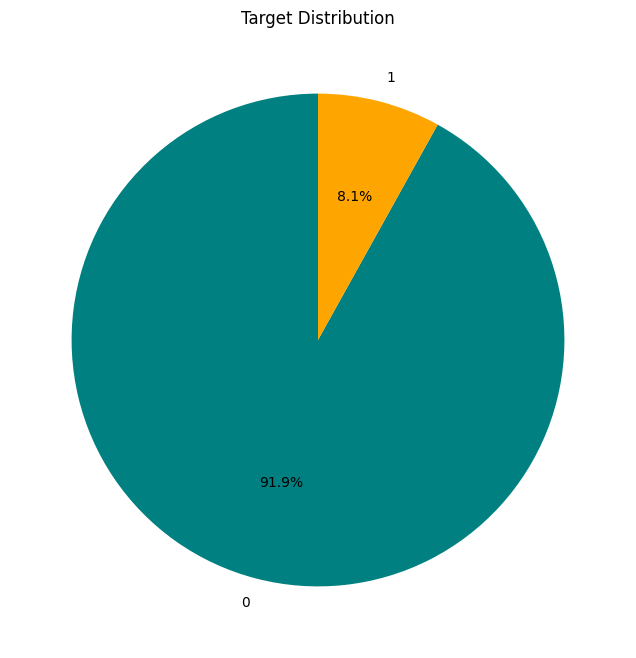

Target Counts:
0    282686
1     24825
Name: TARGET, dtype: int64


In [ ]:
colors = ['teal', 'orange']
plt.figure(figsize=(8, 8))
df_final_ok['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Target Distribution")
plt.ylabel("")
plt.show()

target_counts = df_final_ok['TARGET'].value_counts()
print("Target Counts:")
print(target_counts)


Terlihat bahwa distribusi antara nilai target 0 dan 1 tidak seimbang. Jumlah entri dengan nilai target 0 jauh lebih banyak daripada nilai target 1. Hal ini menunjukkan ketidakseimbangan kelas dalam dataset.

In [86]:
# Variabel Numerik (nums)
nums = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_EMPLOYED','']

# Variabel Kategorikal (cats)
cats = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                           'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE','OCCUPATION_TYPE','REGION_RATING_CLIENT_W_CITY']


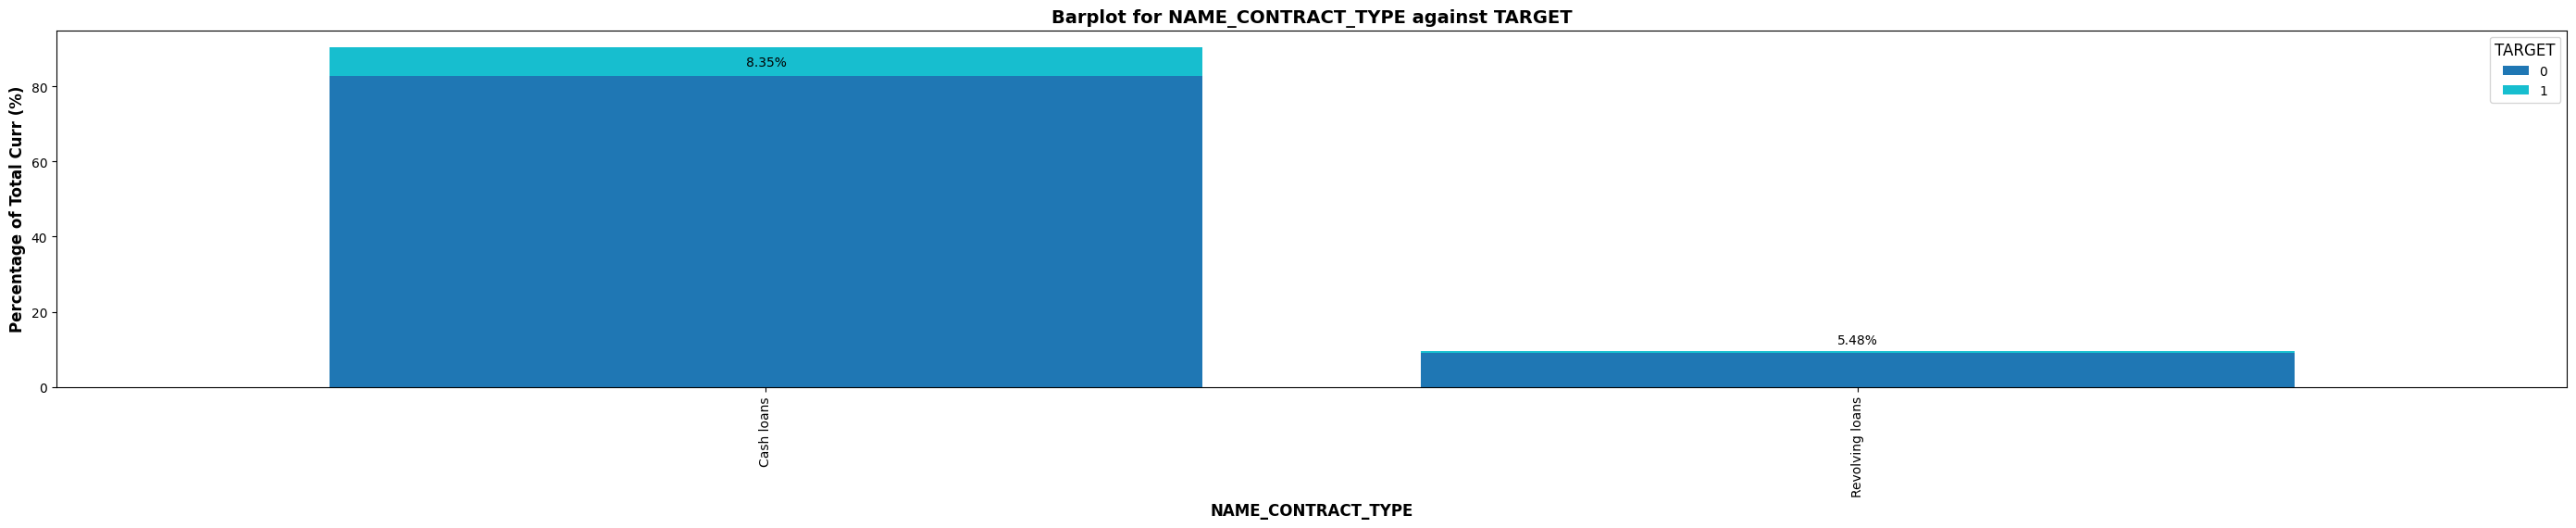

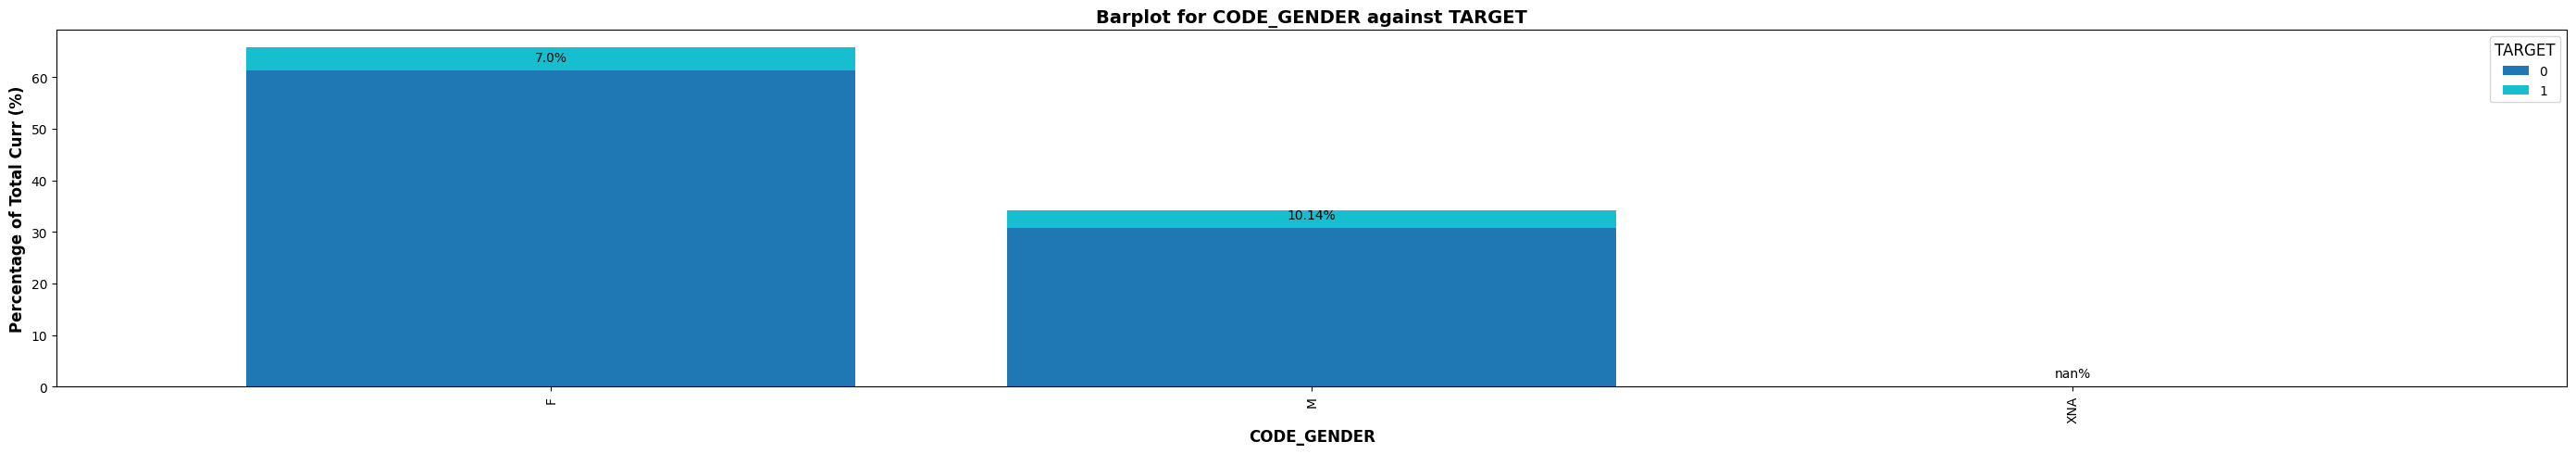

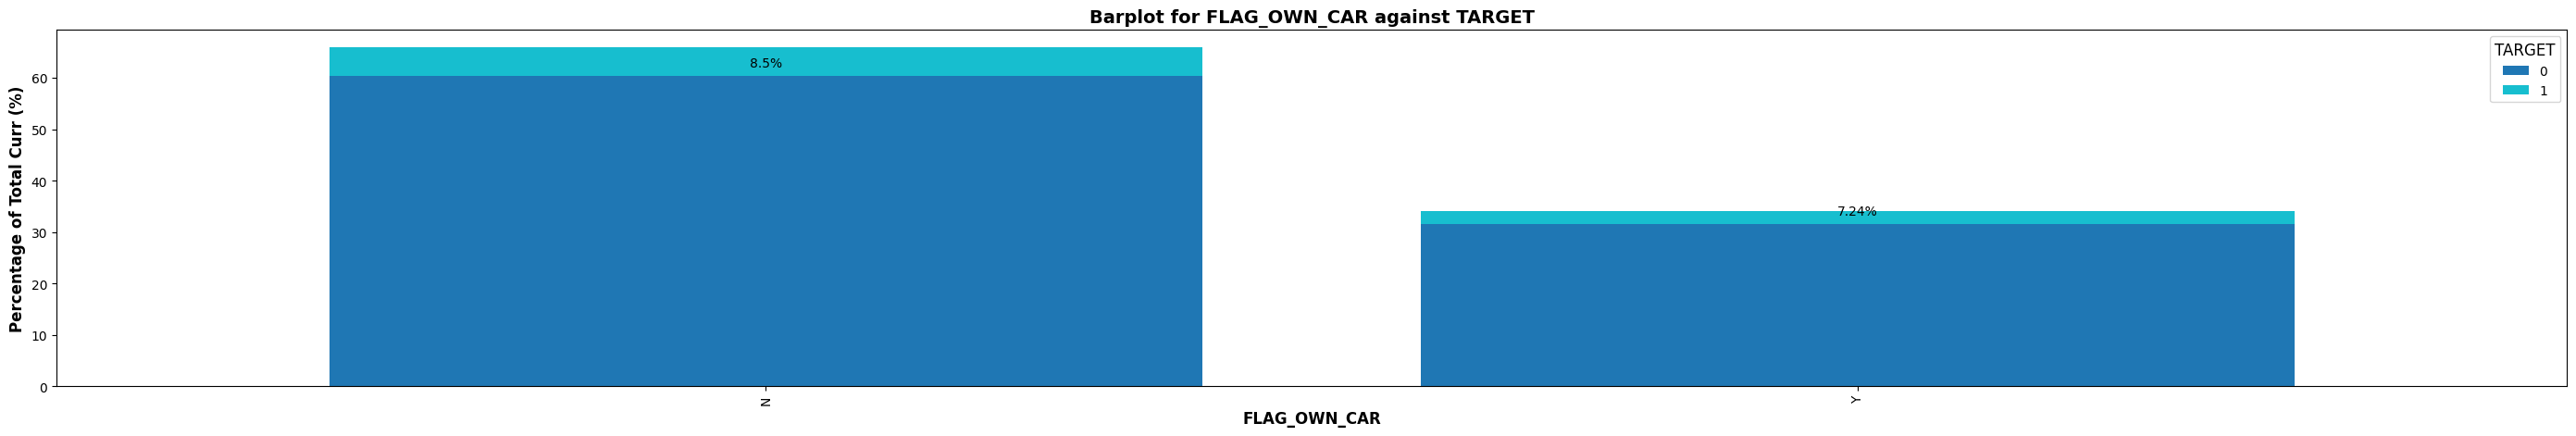

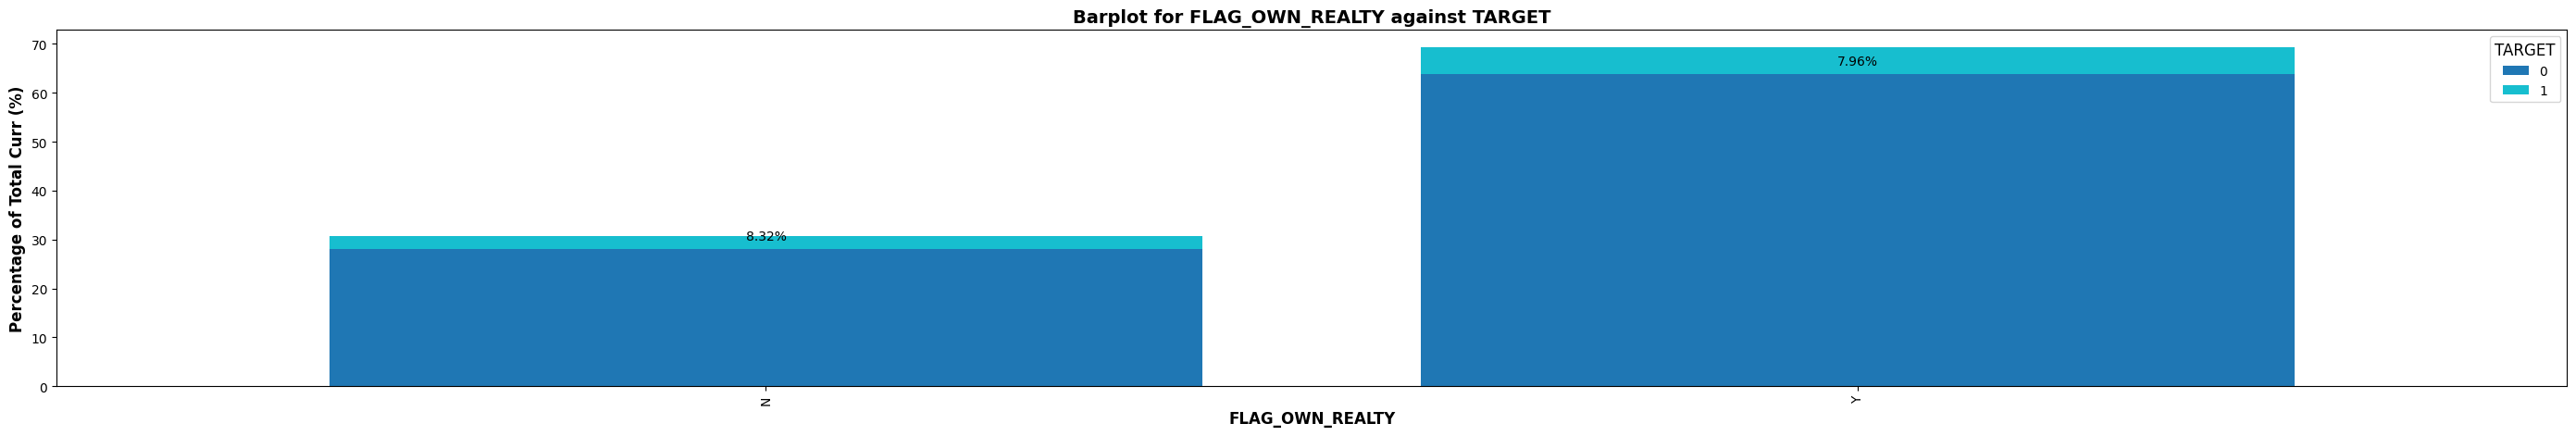

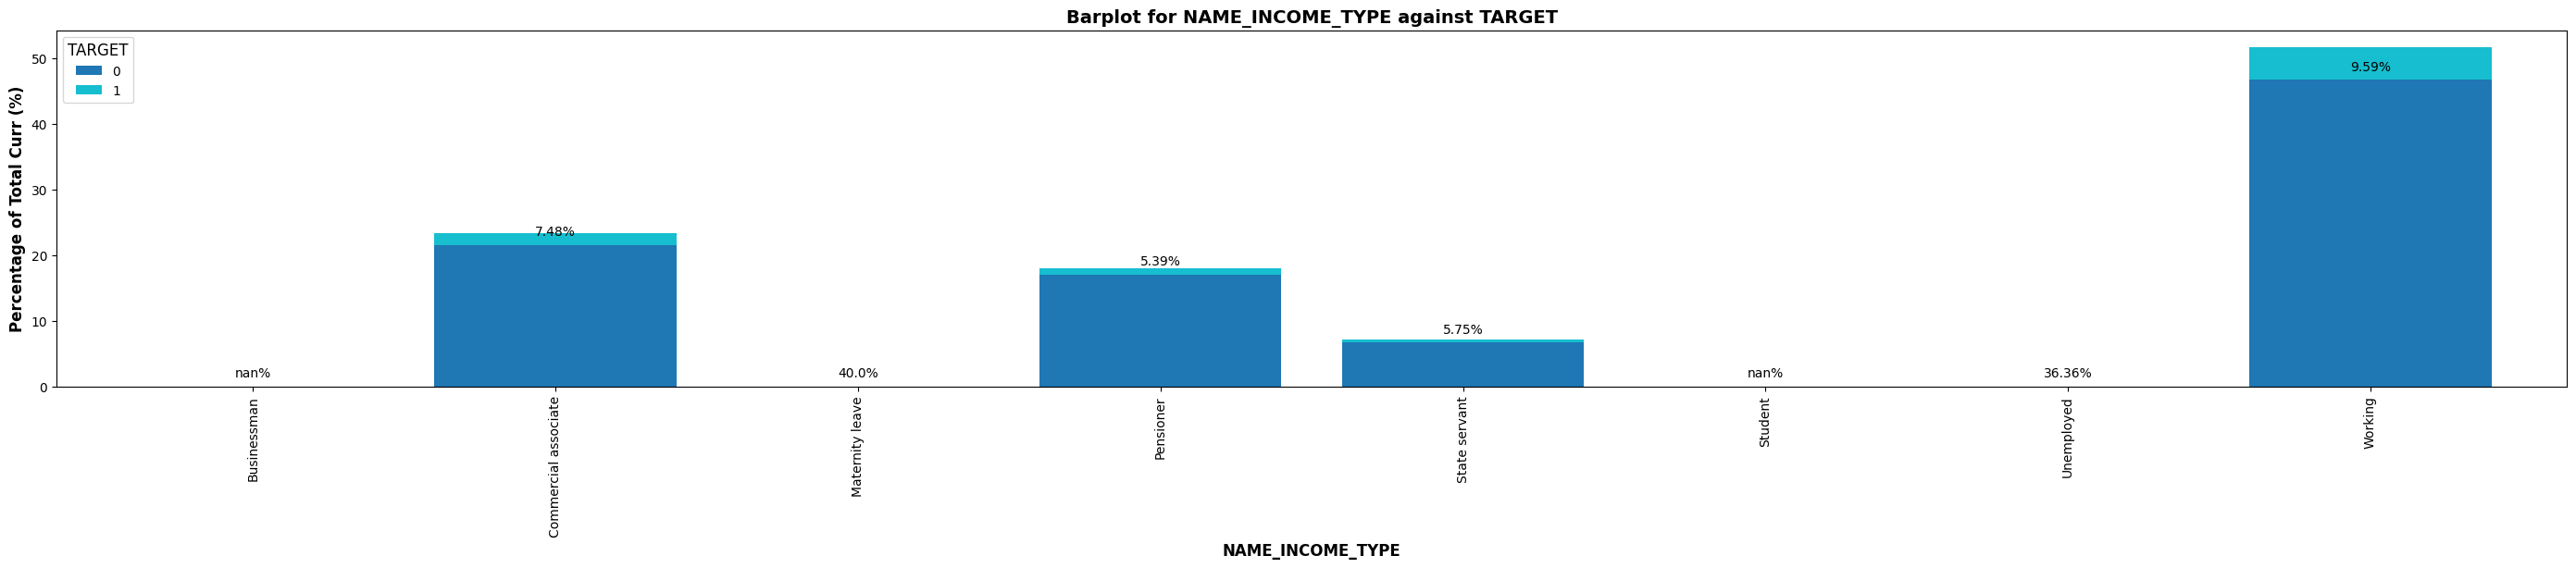

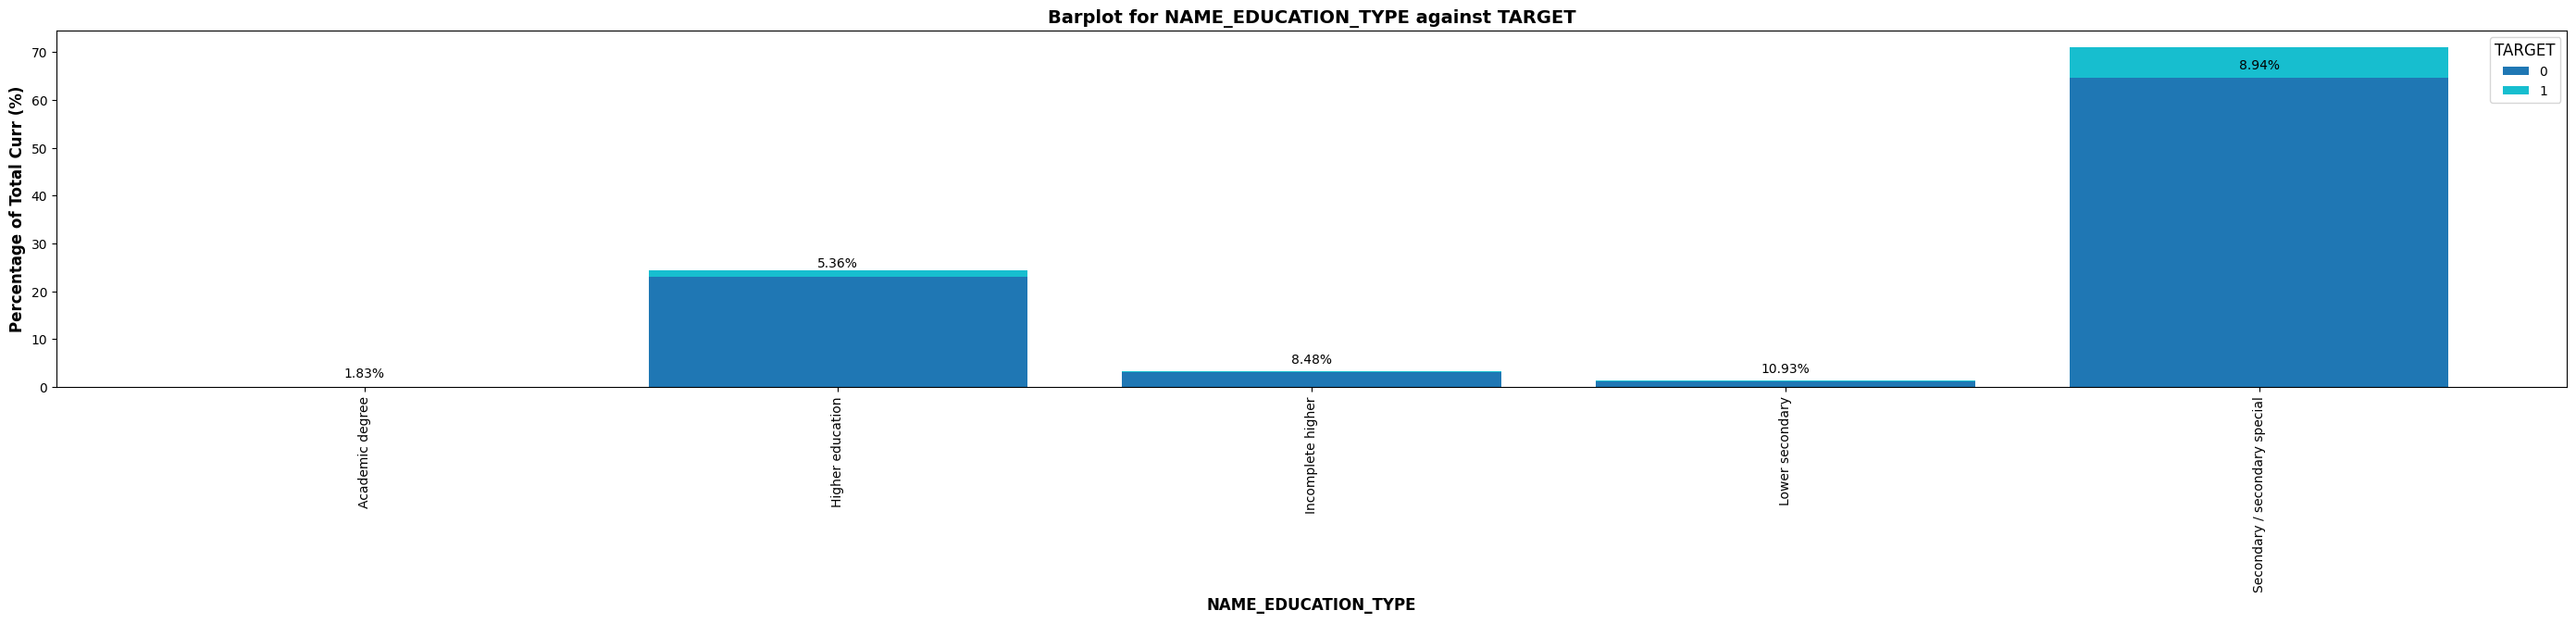

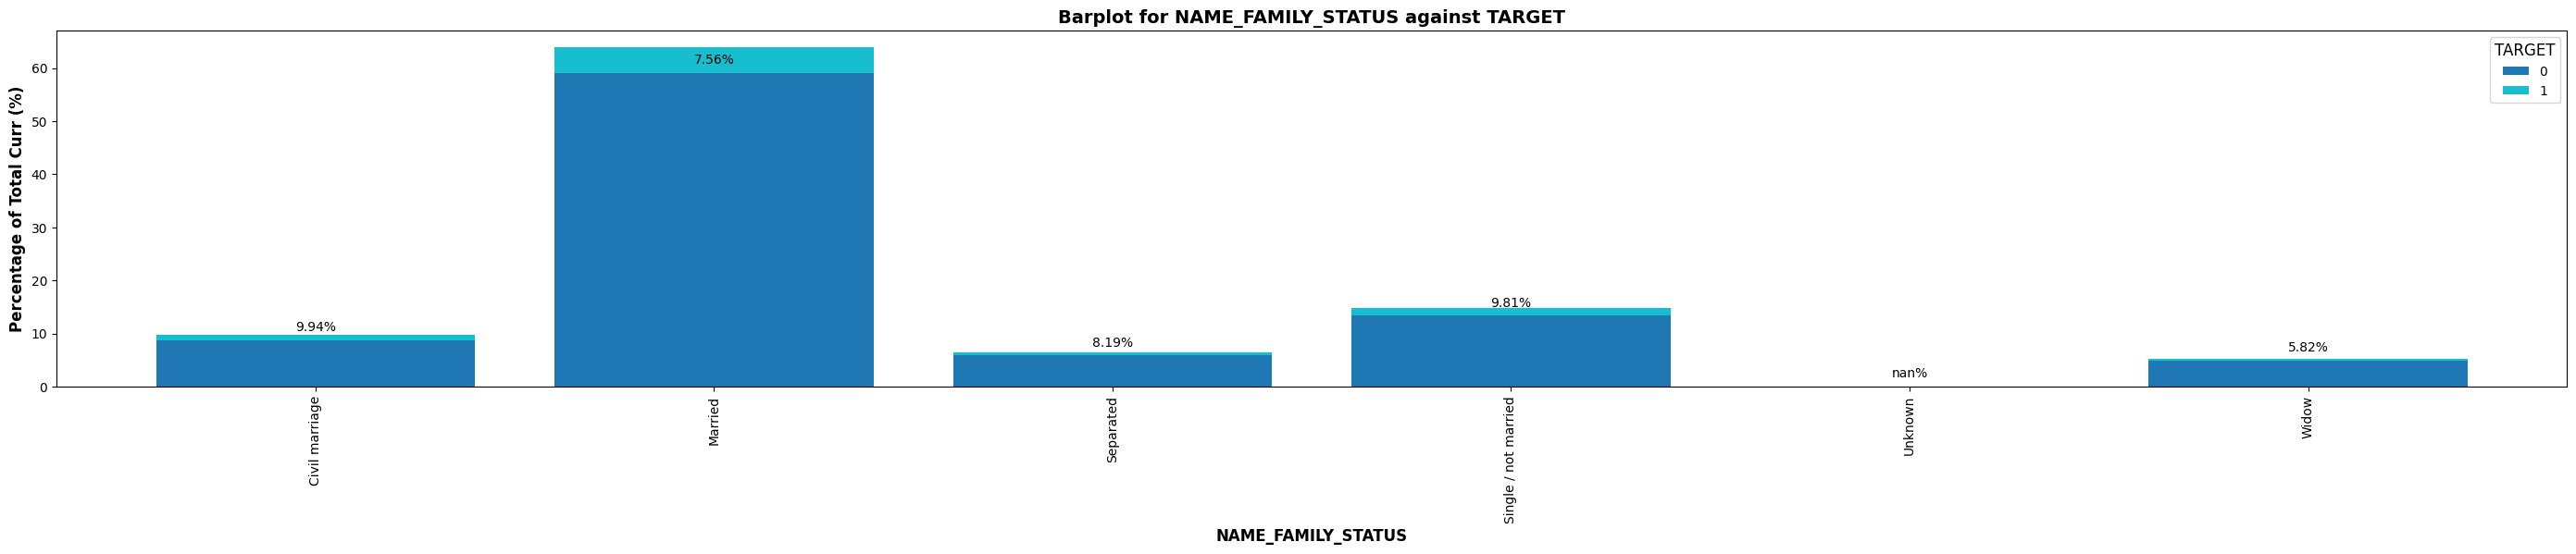

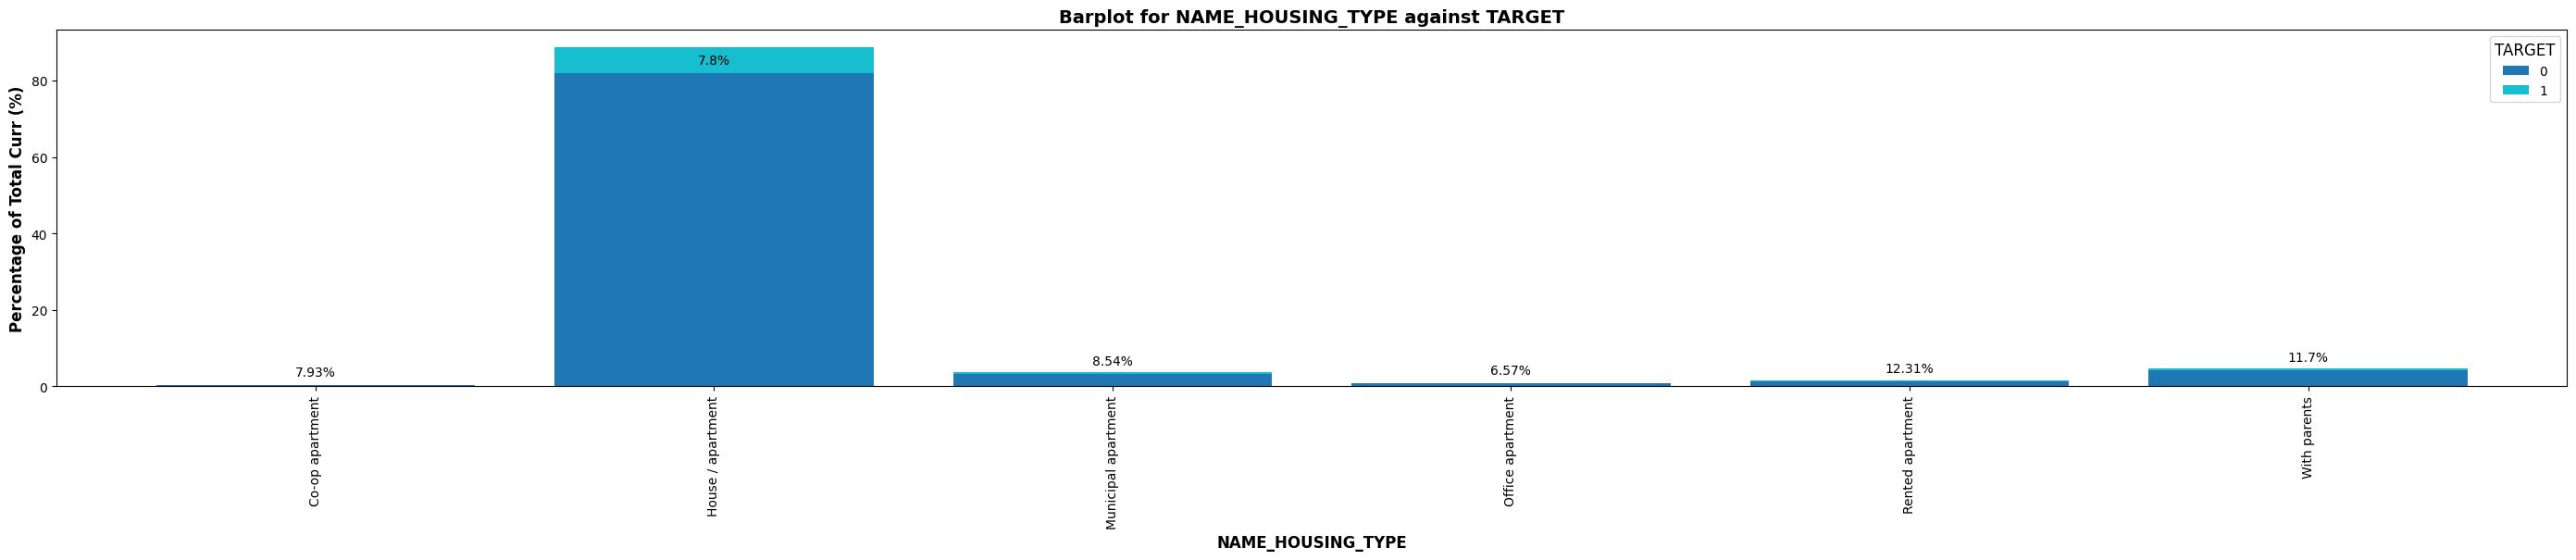

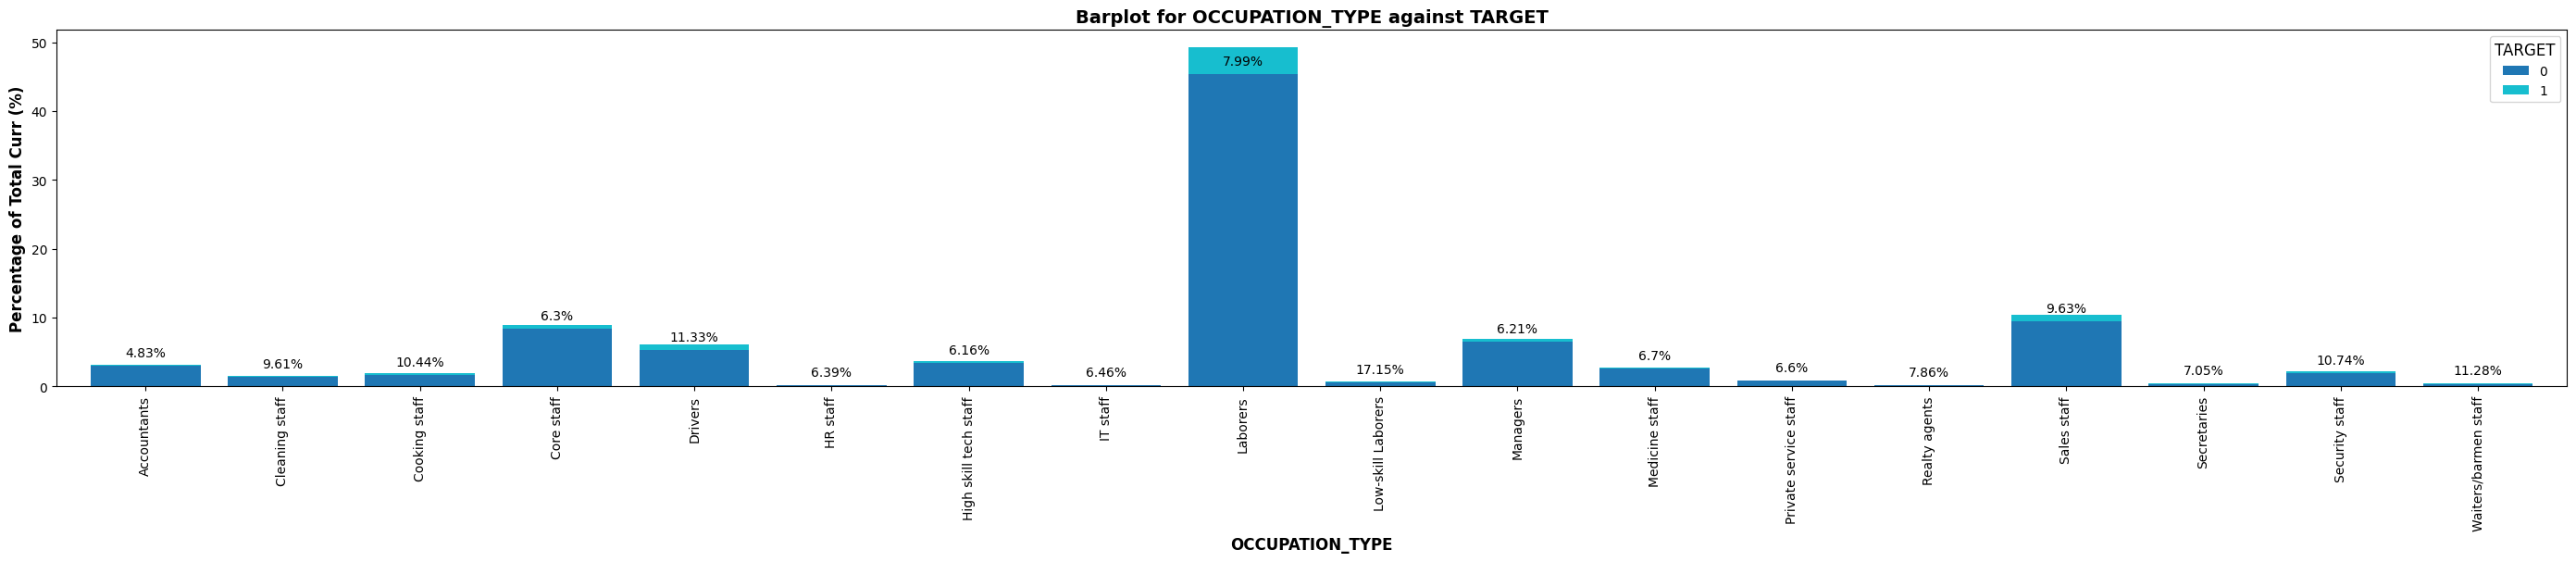

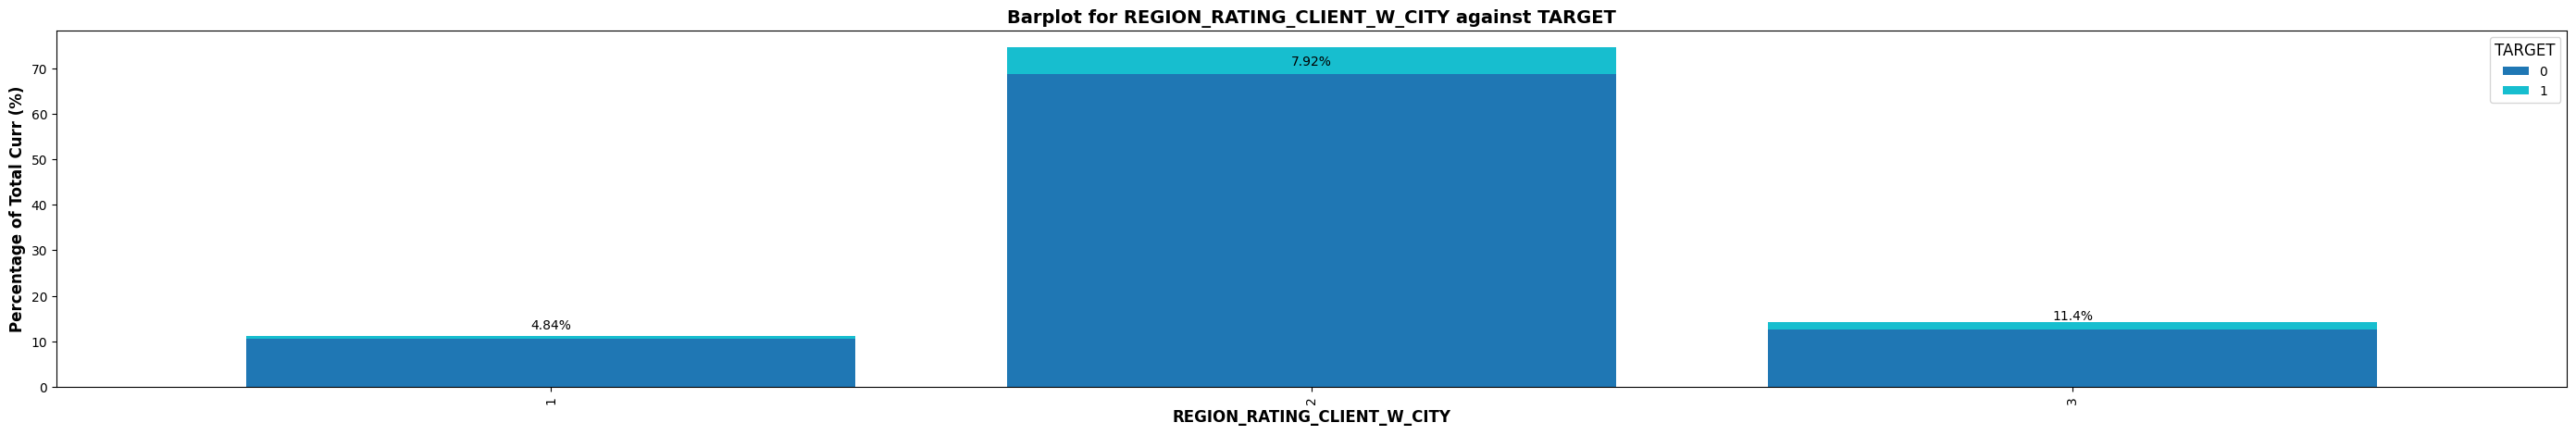

In [ ]:
# Visualisasi barplot presentase fitur kategorik terhadap target
for col in cats:
    if col != 'TARGET':
        dfg = df_final_ok.groupby([col, 'TARGET'])['SK_ID_CURR'].nunique().reset_index()

        dfg_a = df_final_ok.groupby([col, 'TARGET'])['SK_ID_CURR'].nunique().reset_index()
        dfg = df_final_ok.groupby(col)['SK_ID_CURR'].nunique().reset_index()

        dfg['total_df'] = [ 307511  for y in range(df_final_ok[col].nunique())]

        dfg.rename(columns={'SK_ID_CURR': 'total_fitur'}, inplace=True)
        dfg_a.rename(columns={'SK_ID_CURR': 'subtotal'}, inplace=True)
        dfg_merge = dfg_a.merge(dfg, how='left')
        dfg_merge['ratio'] = round(dfg_merge['subtotal'] / dfg_merge['total_df'] * 100, 2)
        dfg_merge['sub_ratio'] = round(dfg_merge['subtotal'] / dfg_merge['total_fitur'] * 100, 2)

        dfg_merge1 = dfg_merge.pivot_table(index=col, columns='TARGET', values='sub_ratio')
        dfg_merge2 = dfg_merge.pivot_table(index=col, columns='TARGET', values='ratio')

        # Mengatur ukuran gambar dengan plt.rcParams
        plt.rcParams['figure.figsize'] = (35, 5)  # Sesuaikan ukuran lebar dan tinggi gambar di sini
        bar = dfg_merge2.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)  # Sesuaikan nilai width sesuai kebutuhan
        for i in bar.containers[:int(len(bar.containers) / 2)]:
            bar.bar_label(i, padding=5, fmt="{:0,.2f}%", label_type='edge', labels=[f'{x}%' for x in dfg_merge1[1].values])
        plt.ylabel('Percentage of Total Curr (%)', fontsize=12, fontweight='bold')
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.title(f'Barplot for {col} against TARGET', fontsize=14, fontweight='bold')
        plt.legend(title='TARGET', title_fontsize='12', labels=['0', '1'])
        plt.show()


Interpretasi :

1. Pelanggan dengan jenis kredit 'Cash Loans' memiliki kecenderungan gagal bayar sebesar 8,53%, sedangkan pada 'Revolving Loans' hanya sebesar 5,48%. Ini menunjukkan bahwa pelanggan 'Cash Loans' lebih mungkin mengalami kesulitan pembayaran dibandingkan dengan pelanggan 'Revolving Loans'

2. Customers dengan NAME_FAMILY_STATUS Civil marriage dan single/not married memiliki persentase kecenderungna gagal bayar lebih tinggi berturut-turut sebesar 9,94% dan 9,81% di bandingkan dengan NAME_FAMILY_STATUS Married, Separated dan Widow. Pelanggan yang masih lajang atau tidak menikah mungkin memiliki tanggung jawab keuangan yang lebih besar atau pengeluaran yang tidak terduga. Di sisi lain, pelanggan yang menikah mungkin memiliki sumber pendapatan ganda dan dukungan finansial yang lebih stabil serta pengelolaan keuangan yang sudah matang.

3. Customer dengan NAME_EDUCATIAN_TYPE lower secondary memiliki potensi kecenderungan gagal bayar paling tinggi sebesar 10,93%. Selanjutnya tertinggi kedua dan ketiga adalah Secondary/secondary special dan incomplete higher sebesar 8,94% dan 8,48%. Customer yang memiliki kecenderungan gagal bayar rendah memiliki NAME_EDUCATION_TYPE higher education dan academic degree. Hal ini dapat disebabkan karena keterbatasan akses ekonomi, pengaruh tingkat pendidikan terhadap penghasilan, dan pemahaman yang lebih baik tentang manajemen keuangan pada pelanggan dengan pendidikan tinggi.

4. Customer dengan NAME_INCOME_TYPE Materniry Leave dan Unemployed memiliki potensi gagal bayar yang tinggi sebesar 40% dan 36.36 %. Hal ini karena keduanya mewakili kondisi di mana sumber pendapatan mungkin terbatas atau tidak ada sama sekali. Kondisi cuti melahirkan dan pengangguran dapat mengakibatkan ketidakstabilan keuangan, mempersulit pelanggan untuk memenuhi kewajiban pembayaran.

5. Customer dengan nilai 'REGION_RATING_CLIENT_W_CITY' pada rating 3 memiliki potensi gagal bayar tertinggi (11,4%), kemungkinan karena wilayah dengan rating 3 mungkin memiliki kondisi ekonomi yang lebih sulit atau risiko kredit yang lebih tinggi. Di posisi kedua, rating 2 sebesar 7,92%, yang mungkin mencerminkan tingkat risiko yang lebih rendah tetapi tetap signifikan. Wilayah dengan rating 1 menunjukkan potensi gagal bayar yang lebih rendah (4,84%), kemungkinan karena kondisi ekonomi yang lebih stabil atau lebih sedikit risiko kredit.

6. Customerdengan tipe pekerjaan seperti 'Low-skill Laborers', 'Drivers', 'Waiters/Barmen Staff', 'Security Staff', dan 'Cooking Staff' memiliki potensi gagal bayar yang tinggi (17.15%, 11.33%, 11.28%, 10.74%, dan 10.44%) karena pekerjaan-pekerjaan ini sering terkait dengan tingkat pendapatan yang rendah dan tingkat ketidakpastian pekerjaan yang tinggi.

7. Pelanggan yang tinggal di apartemen sewa dan tinggal bersama orang tua memiliki potensi gagal bayar yang lebih tinggi (12.31% dan 11.7%) mungkin disebabkan oleh kenyataan bahwa kedua situasi tempat tinggal ini dapat mencerminkan ketidakstabilan keuangan atau keterbatasan sumber daya finansial. Pengeluaran tinggi untuk biaya sewa apartemen atau ketergantungan pada dukungan finansial orang tua dapat meningkatkan risiko kesulitan dalam memenuhi kewajiban pembayaran kredit.


## Bivariate Analysis

ValueError: ignored

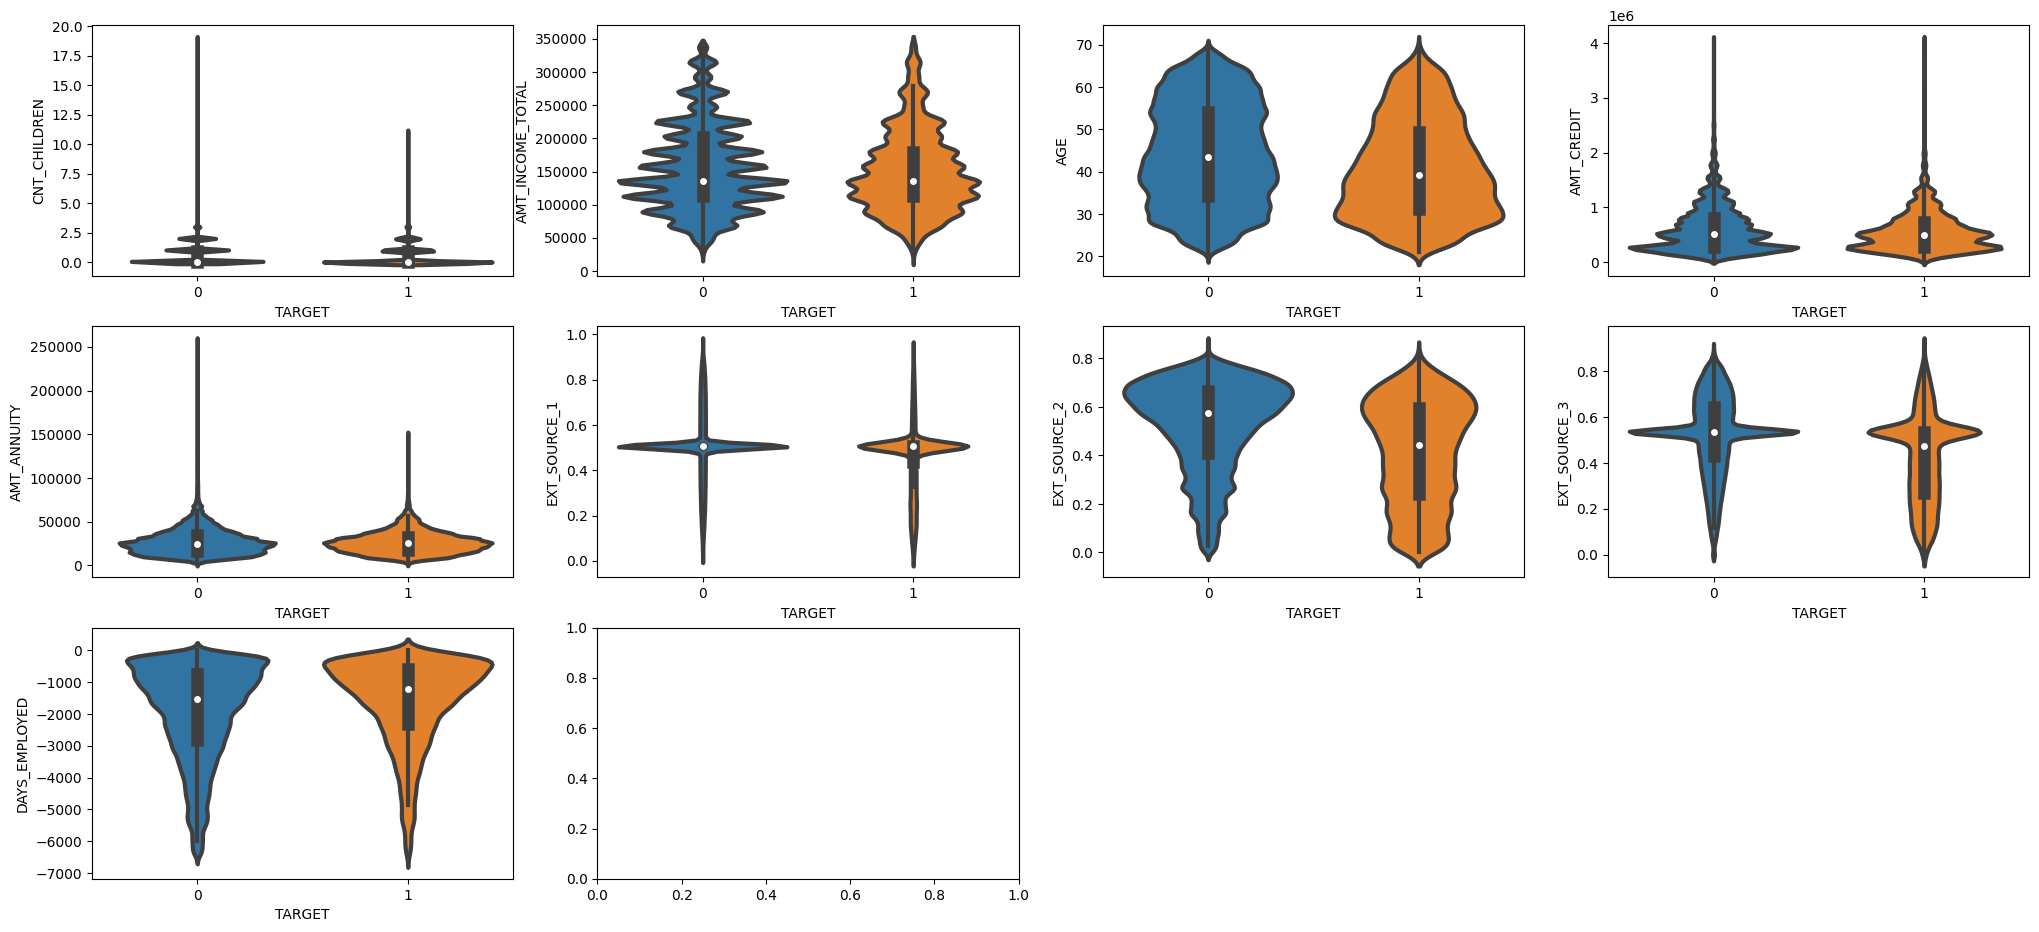

In [89]:
import math

plt.figure(figsize=(25, 15))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 4, i+1)
  sns.violinplot(data=df_final_ok, y=nums[i], x='TARGET', linewidth=3, orient='v')
plt.savefig('uninum.png')

### Data Preprocessing Train and Test

### Handling Outlier

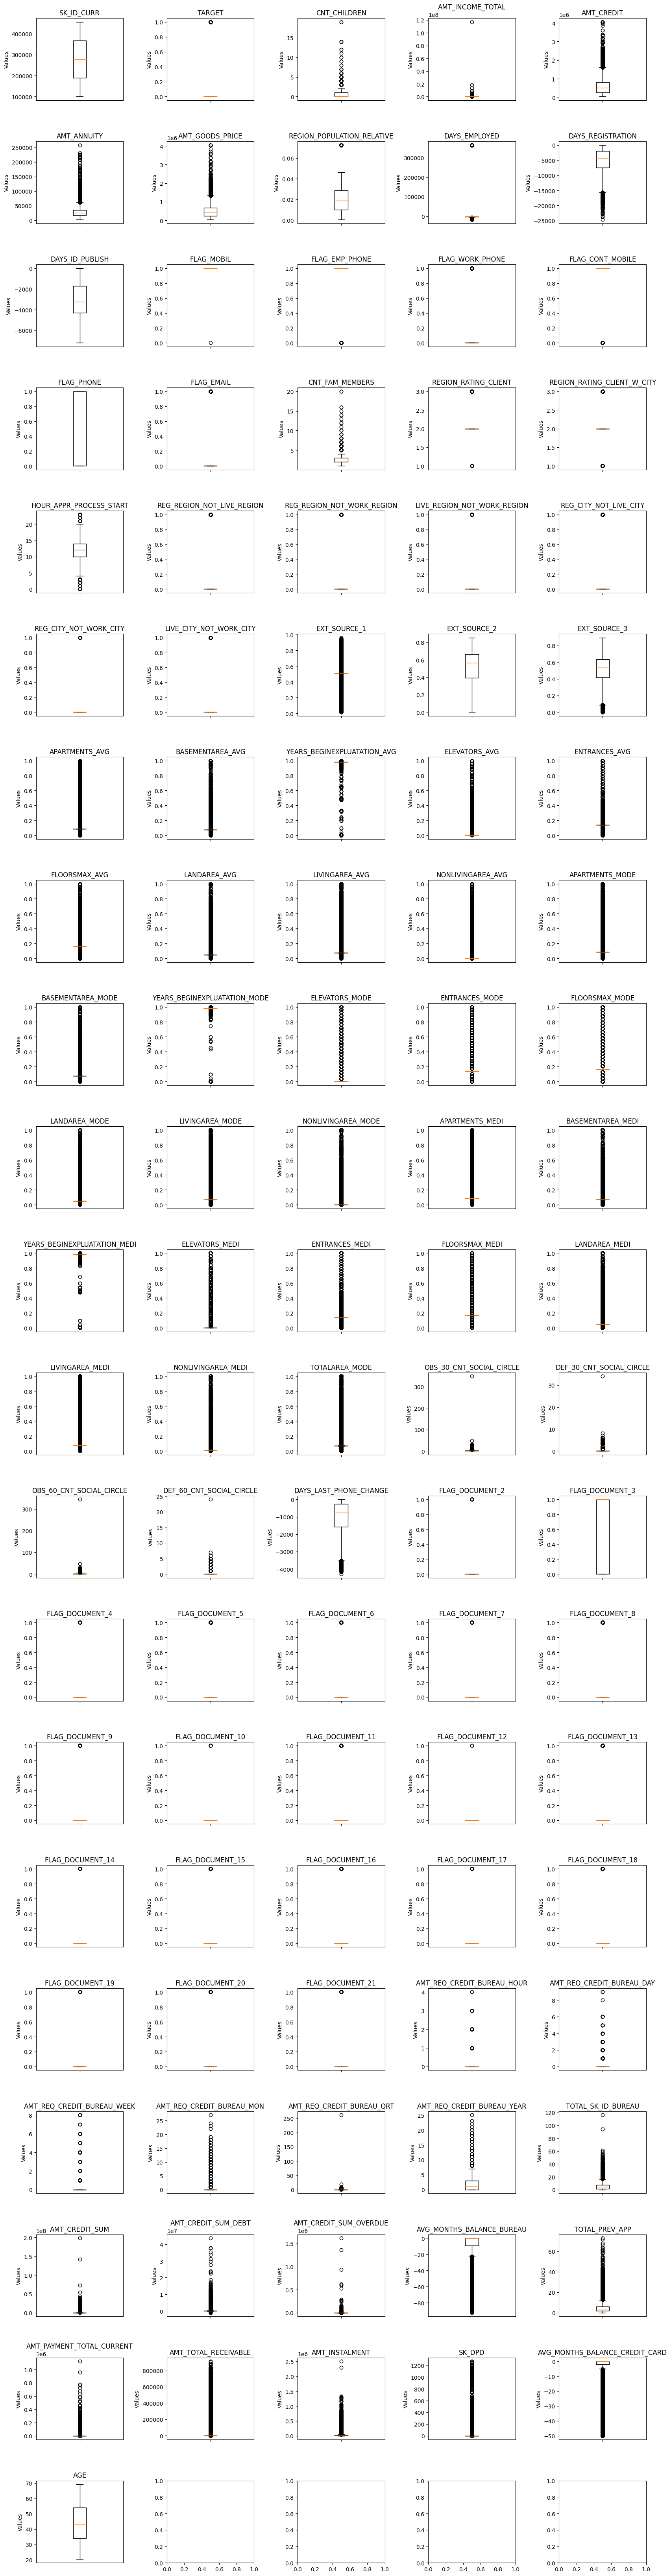

In [ ]:
# CHECK _OUTLIERS_ IN NUMERIC COLUMNS
numeric_columns = df_final_ok.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of subplots needed based on the number of numeric columns
num_subplots = len(numeric_columns)
num_cols_per_subplot = 5
num_rows = (num_subplots - 1) // num_cols_per_subplot + 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols_per_subplot, figsize=(20, 4 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axs = axs.ravel()

# Loop through numeric columns and create box plots
for i, col in enumerate(numeric_columns):
    axs[i].boxplot(df_final_ok[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels([])
    axs[i].set_ylabel('Values')

# Show plots
plt.show()

In [ ]:
def outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_1 = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_1

In [ ]:
# Columns to apply the outlier function to
columns_to_process = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']

# Isolate the columns you want to process
selected_columns = df_final_ok[columns_to_process]

# Apply the outlier function to selected columns
processed_columns = outlier(selected_columns)

# Replace the original columns with the processed columns
df_final_ok[columns_to_process] = processed_columns
df_final_ok.fillna(method='bfill',inplace=True)

Because the gender have 3 entity instead 2, we should drop entity XNA

In [ ]:
df_final_ok['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
# Filter out data Not M or F
valid_genders = ['M', 'F']
df_final_ok = df_final_ok[df_final_ok['CODE_GENDER'].isin(valid_genders)]
df_test_ok = df_test_ok[df_test_ok['CODE_GENDER'].isin(valid_genders)]

# Drop rows with NaN values from both training and test DataFrames
df_final_ok.dropna(inplace=True)
df_test_ok.dropna(inplace=True)

### Feature Selection

In [ ]:
# Melihat Categorical Feature
categorical_columns = df_final_ok.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df_final_ok[col].unique()}")

Column: NAME_CONTRACT_TYPE
Unique values: ['Cash loans' 'Revolving loans']
Column: CODE_GENDER
Unique values: ['M' 'F']
Column: FLAG_OWN_CAR
Unique values: ['N' 'Y']
Column: FLAG_OWN_REALTY
Unique values: ['Y' 'N']
Column: NAME_TYPE_SUITE
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Column: NAME_INCOME_TYPE
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Column: NAME_EDUCATION_TYPE
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Column: NAME_FAMILY_STATUS
Unique values: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Column: NAME_HOUSING_TYPE
Unique values: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Column: OCCUPATION_TYPE
Unique values: ['Laborers' 'Core 

NAME_CONTRACT_TYPE

CODE_GENDER

NAME_INCOME_TYPE

NAME_EDUCATION_TYPE

NAME_FAMILY_STATUS

NAME_HOUSING_TYPE





In [ ]:
# Melihat Numerical Features
numeric_columns = df_final_ok.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    print(f"Column: {col}")

Column: SK_ID_CURR
Column: TARGET
Column: CNT_CHILDREN
Column: AMT_INCOME_TOTAL
Column: AMT_CREDIT
Column: AMT_ANNUITY
Column: AMT_GOODS_PRICE
Column: REGION_POPULATION_RELATIVE
Column: DAYS_EMPLOYED
Column: DAYS_REGISTRATION
Column: DAYS_ID_PUBLISH
Column: FLAG_MOBIL
Column: FLAG_EMP_PHONE
Column: FLAG_WORK_PHONE
Column: FLAG_CONT_MOBILE
Column: FLAG_PHONE
Column: FLAG_EMAIL
Column: CNT_FAM_MEMBERS
Column: REGION_RATING_CLIENT
Column: REGION_RATING_CLIENT_W_CITY
Column: HOUR_APPR_PROCESS_START
Column: REG_REGION_NOT_LIVE_REGION
Column: REG_REGION_NOT_WORK_REGION
Column: LIVE_REGION_NOT_WORK_REGION
Column: REG_CITY_NOT_LIVE_CITY
Column: REG_CITY_NOT_WORK_CITY
Column: LIVE_CITY_NOT_WORK_CITY
Column: EXT_SOURCE_1
Column: EXT_SOURCE_2
Column: EXT_SOURCE_3
Column: APARTMENTS_AVG
Column: BASEMENTAREA_AVG
Column: YEARS_BEGINEXPLUATATION_AVG
Column: ELEVATORS_AVG
Column: ENTRANCES_AVG
Column: FLOORSMAX_AVG
Column: LANDAREA_AVG
Column: LIVINGAREA_AVG
Column: NONLIVINGAREA_AVG
Column: APARTMENT

In [ ]:
X_numerical = df_final_ok[numeric_columns]
y_target = df_final_ok['TARGET']

# Hitung korelasi Pearson
correlation_matrix = X_numerical.corrwith(y_target)

# Buat DataFrame untuk menyimpan hasil korelasi
correlation_df = pd.DataFrame({'Feature': correlation_matrix.index, 'Correlation with Target': correlation_matrix.values})

In [ ]:
# Mengurutkan DataFrame berdasarkan nilai korelasi
correlation_df_sorted = correlation_df.sort_values(by='Correlation with Target', ascending=False)
correlation_df_sorted

,Feature,Correlation with Target
1,TARGET,1.000000
19,REGION_RATING_CLIENT_W_CITY,0.060895
18,REGION_RATING_CLIENT,0.058901
8,DAYS_EMPLOYED,0.057265
62,DAYS_LAST_PHONE_CHANGE,0.055218
...,...,...
6,AMT_GOODS_PRICE,-0.039625
100,AGE,-0.078242
27,EXT_SOURCE_1,-0.098887
29,EXT_SOURCE_3,-0.155899


Mendrop kolom yang nilai correlation dengan target kurang dari 0.02/*-0.02*

- OBS_30_CNT_SOCIAL_CIRCLE	0.009451455593512868
- OBS_60_CNT_SOCIAL_CIRCLE	0.009342162233681242
- CNT_FAM_MEMBERS	0.009310713991888486
- REG_REGION_NOT_WORK_REGION	0.006941022446719004
- AMT_CREDIT_SUM_OVERDUE 0.006379844077546479
- SK_DPD	0.005680102739875211
- REG_REGION_NOT_LIVE_REGION	0.005575470256383598
- AMT_REQ_CREDIT_BUREAU_YEAR	0.005525633650308629
- FLAG_DOCUMENT_2	0.005417122311306714
- AVG_MONTHS_BALANCE_CREDIT_CARD	0.00485728272884465
- FLAG_DOCUMENT_21	0.003708556595591456
- LIVE_REGION_NOT_WORK_REGION	0.00281868799659601
- AMT_REQ_CREDIT_BUREAU_DAY	0.0017008483984039815
- FLAG_MOBIL	0.0005344028355996189
- FLAG_CONT_MOBILE	0.000370293715735948
- FLAG_DOCUMENT_20	0.00021530683770289077
- AMT_REQ_CREDIT_BUREAU_HOUR	-7.390080250404676e-05
- FLAG_DOCUMENT_5	-0.0003162551662712791
- FLAG_DOCUMENT_12	-0.0007557609667322472
- AMT_REQ_CREDIT_BUREAU_WEEK	-0.0013062712002748621
- FLAG_DOCUMENT_19	-0.0013576131686521566
- FLAG_DOCUMENT_10	-0.0014139107969741345
- FLAG_DOCUMENT_7	-0.0015195574291065024
- FLAG_EMAIL	-0.00175933037037596
- SK_ID_CURR	-0.002111392829707938
- FLAG_DOCUMENT_4	-0.002672118455791432
- FLAG_DOCUMENT_17	-0.0033776340377058714
- AMT_CREDIT_SUM_DEBT	-0.0037415723291125036
- YEARS_BEGINEXPLUATATION_MODE	-0.004060995170136698
- FLAG_DOCUMENT_11	-0.004229593750496414
- FLAG_DOCUMENT_9	-0.004352652247628918
- YEARS_BEGINEXPLUATATION_AVG	-0.00466465596965053
- YEARS_BEGINEXPLUATATION_MEDI	-0.0048714851327826434
- AMT_REQ_CREDIT_BUREAU_QRT	-0.005833049935276062
- FLAG_DOCUMENT_15	-0.006535795521912456
- FLAG_DOCUMENT_18	-0.007952739053099244
- FLAG_DOCUMENT_8	-0.008041540991144095
- AMT_INSTALMENT	-0.008649597019148799
- FLAG_DOCUMENT_14	-0.009464036716546682
- CNT_CHILDREN	0.01918911294753722
- AMT_PAYMENT_TOTAL_CURRENT	0.017479427693409155
- TOTAL_SK_ID_BUREAU	-0.010016571531794683
- FLAG_DOCUMENT_13	-0.011583458494690583
- FLAG_DOCUMENT_16	-0.011615064988680469
- LANDAREA_MODE	-0.011860932889077651
- LANDAREA_AVG	-0.01204841336125003
- LANDAREA_MEDI	-0.01227058749544655
- AMT_ANNUITY	-0.012816709574099272
- ENTRANCES_MODE	-0.01351723616121452
- AMT_REQ_CREDIT_BUREAU_MON	-0.01479164912615534
- AMT_INCOME_TOTAL	-0.015255057558373187
- ENTRANCES_MEDI	-0.015736303902170058
- ENTRANCES_AVG	-0.015986255832387226
- BASEMENTAREA_MODE	-0.01613661904046383
- BASEMENTAREA_MEDI	-0.017255044992492495
- BASEMENTAREA_AVG	-0.017634127055457933
- NONLIVINGAREA_MODE	-0.017984458663491378
- NONLIVINGAREA_MEDI	-0.01809513097284796
- NONLIVINGAREA_AVG	-0.01818769091976999

In [ ]:
#Data Train
columns_drop= [
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'CNT_FAM_MEMBERS',
    'REG_REGION_NOT_WORK_REGION',
    'AMT_CREDIT_SUM_OVERDUE',
    'SK_DPD',
    'REG_REGION_NOT_LIVE_REGION',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'FLAG_DOCUMENT_2',
    'AVG_MONTHS_BALANCE_CREDIT_CARD',
    'FLAG_DOCUMENT_21',
    'LIVE_REGION_NOT_WORK_REGION',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'FLAG_MOBIL',
    'FLAG_CONT_MOBILE',
    'FLAG_DOCUMENT_20',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_12',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_7',
    'FLAG_EMAIL',
    'SK_ID_CURR',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_17',
    'AMT_CREDIT_SUM_DEBT',
    'YEARS_BEGINEXPLUATATION_MODE',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_9',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_8',
    'AMT_INSTALMENT',
    'FLAG_DOCUMENT_14',
    'CNT_CHILDREN',
    'AMT_PAYMENT_TOTAL_CURRENT',
    'TOTAL_SK_ID_BUREAU',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_16',
    'LANDAREA_MODE',
    'LANDAREA_AVG',
    'LANDAREA_MEDI',
    'AMT_ANNUITY',
    'ENTRANCES_MODE',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_INCOME_TOTAL',
    'ENTRANCES_MEDI',
    'ENTRANCES_AVG',
    'BASEMENTAREA_MODE',
    'BASEMENTAREA_MEDI',
    'BASEMENTAREA_AVG',
    'NONLIVINGAREA_MODE',
    'NONLIVINGAREA_MEDI',
    'NONLIVINGAREA_AVG',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE'
]

# Mendrop kolom-kolom tersebut dari DataFrame
df_final_sel= df_final_ok.drop(columns=columns_drop)

In [ ]:
df_final_sel.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_CREDIT_SUM,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_TOTAL_RECEIVABLE,AGE
0,1,Cash loans,M,406597.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637.0,-3648.0,-2120,1,0,1,2,2,10,0,0,0,0.083037,0.262949,0.139376,0.0247,0.00,0.0833,0.0190,0.0252,0.0000,0.0833,0.0198,0.0250,0.00,0.0833,0.0193,block of flats,0.0149,"Stone, brick",No,2.0,2.0,-1134.0,1,0,108131.945625,-21.875,1.0,0.0,25.920548
1,0,Cash loans,F,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188.0,-1186.0,-291,1,0,1,1,1,11,0,0,0,0.311267,0.622246,0.535276,0.0959,0.08,0.2917,0.0549,0.0924,0.0806,0.2917,0.0554,0.0968,0.08,0.2917,0.0558,block of flats,0.0714,Block,No,0.0,0.0,-828.0,1,0,254350.125000,0.000,3.0,0.0,45.931507
2,0,Revolving loans,M,135000.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225.0,-4260.0,-2531,1,1,1,2,2,9,0,0,0,0.505998,0.555912,0.729567,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-815.0,0,0,94518.900000,0.000,1.0,0.0,52.180822
3,0,Cash loans,F,312682.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039.0,-9833.0,-2437,1,0,0,2,2,17,0,0,0,0.505998,0.650442,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-617.0,1,0,0.000000,0.000,9.0,0.0,52.068493
4,0,Cash loans,M,513000.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038.0,-4311.0,-3458,1,0,0,2,2,11,0,1,1,0.505998,0.322738,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-1106.0,0,0,146250.000000,0.000,6.0,0.0,54.608219


In [ ]:
#Data Test
df_test_sel= df_test_ok.drop(columns=columns_drop)

In [ ]:
df_test_sel.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_CREDIT_SUM,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_TOTAL_RECEIVABLE,AGE
0,Cash loans,F,568800.0,450000.0,Working,Higher education,Married,House / apartment,0.018850,-2329,-5170.0,-812,1,0,0,2,2,18,0,0,0,0.752614,0.789654,0.159520,0.0660,0.00,0.1250,0.0505,0.0672,0.0000,0.1250,0.0526,0.0666,0.00,0.1250,0.0514,block of flats,0.0392,"Stone, brick",No,0.0,0.0,-1740.0,1,0,207623.571429,-11.785714,1.0,0.000000,52.715068
1,Cash loans,M,222768.0,180000.0,Working,Secondary / secondary special,Married,House / apartment,0.035792,-4469,-9118.0,-1623,1,0,0,2,2,9,0,0,0,0.564990,0.291656,0.432962,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,0.0,1,0,219042.000000,-3.000000,2.0,0.000000,49.490411
2,Cash loans,M,663264.0,630000.0,Working,Higher education,Married,House / apartment,0.019101,-4458,-2175.0,-3503,1,0,0,2,2,14,0,0,0,0.506771,0.699787,0.610991,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,-856.0,0,0,518070.015000,-28.250000,4.0,0.000000,54.898630
3,Cash loans,F,1575000.0,1575000.0,Working,Secondary / secondary special,Married,House / apartment,0.026392,-1866,-2000.0,-4208,1,0,1,2,2,11,0,0,0,0.525734,0.509677,0.612704,0.3052,0.32,0.3750,0.3673,0.3109,0.3222,0.3750,0.3827,0.3081,0.32,0.3750,0.3739,block of flats,0.3700,Panel,No,0.0,0.0,-1805.0,1,0,126739.590000,-22.833333,5.0,7968.609184,38.290411
4,Cash loans,M,625500.0,625500.0,Working,Secondary / secondary special,Married,House / apartment,0.010032,-2191,-4000.0,-4262,1,1,0,2,2,5,0,1,1,0.202145,0.425687,0.519097,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,block of flats,0.0707,Panel,No,0.0,0.0,-821.0,1,0,0.000000,0.000000,2.0,0.000000,35.726027


### Encoding

#### In Train

In [ ]:
#In Data Train
df_final_encod = df_final_sel.copy()

In [ ]:
df_final_encod.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_CREDIT_SUM,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_TOTAL_RECEIVABLE,AGE
0,1,Cash loans,M,406597.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637.0,-3648.0,-2120,1,0,1,2,2,10,0,0,0,0.083037,0.262949,0.139376,0.0247,0.00,0.0833,0.0190,0.0252,0.0000,0.0833,0.0198,0.0250,0.00,0.0833,0.0193,block of flats,0.0149,"Stone, brick",No,2.0,2.0,-1134.0,1,0,108131.945625,-21.875,1.0,0.0,25.920548
1,0,Cash loans,F,1293502.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188.0,-1186.0,-291,1,0,1,1,1,11,0,0,0,0.311267,0.622246,0.535276,0.0959,0.08,0.2917,0.0549,0.0924,0.0806,0.2917,0.0554,0.0968,0.08,0.2917,0.0558,block of flats,0.0714,Block,No,0.0,0.0,-828.0,1,0,254350.125000,0.000,3.0,0.0,45.931507
2,0,Revolving loans,M,135000.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225.0,-4260.0,-2531,1,1,1,2,2,9,0,0,0,0.505998,0.555912,0.729567,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-815.0,0,0,94518.900000,0.000,1.0,0.0,52.180822
3,0,Cash loans,F,312682.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039.0,-9833.0,-2437,1,0,0,2,2,17,0,0,0,0.505998,0.650442,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-617.0,1,0,0.000000,0.000,9.0,0.0,52.068493
4,0,Cash loans,M,513000.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038.0,-4311.0,-3458,1,0,0,2,2,11,0,1,1,0.505998,0.322738,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,block of flats,0.0688,Panel,No,0.0,0.0,-1106.0,0,0,146250.000000,0.000,6.0,0.0,54.608219


In [ ]:
# Menetapkan label 0 untuk 'F' (perempuan) dan label 1 untuk 'M' (laki-laki)
df_final_encod['CODE_GENDER'] = df_final_encod['CODE_GENDER'].replace({'F': 0, 'M': 1})

In [ ]:
#Label encoding

cat_1=['NAME_EDUCATION_TYPE']
cat_cols = []
for col in cat_1:
    map_dict = {k:i for i, k in enumerate(df_final_encod[col].value_counts().index,0)}
    df_final_encod[col] = df_final_encod[col].map(map_dict)

In [ ]:
# One-hot encoding for specified categorical columns
cat_encod=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for cat in cat_encod:
    nominal_encoded = pd.get_dummies(df_final_encod[cat], prefix=cat)
    df_final_encod = pd.concat([df_final_encod, nominal_encoded], axis=1)

# Drop the original categorical columns
df_final_encod.drop(cat_encod, axis=1, inplace=True)

# Drop columns with object dtype (assuming you want to drop all remaining categorical columns)
for column in df_final_encod.columns:
    if df_final_encod[column].dtype == object and column != 'TARGET':
        df_final_encod.drop(column, axis=1, inplace=True)

In [ ]:
df_final_encod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   TARGET                                   307507 non-null  int64  
 1   CODE_GENDER                              307507 non-null  int64  
 2   AMT_CREDIT                               307507 non-null  float64
 3   AMT_GOODS_PRICE                          307507 non-null  float64
 4   NAME_EDUCATION_TYPE                      307507 non-null  int64  
 5   REGION_POPULATION_RELATIVE               307507 non-null  float64
 6   DAYS_EMPLOYED                            307507 non-null  float64
 7   DAYS_REGISTRATION                        307507 non-null  float64
 8   DAYS_ID_PUBLISH                          307507 non-null  int64  
 9   FLAG_EMP_PHONE                           307507 non-null  int64  
 10  FLAG_WORK_PHONE                 

Setelah feature di encoding, jumlah feature berbeda dengan test, oleh karena itu, perlu drop feature  NAME_INCOME_TYPE_Maternity leave dan  NAME_FAMILY_STATUS_Unknown              

In [ ]:
# List of columns to be dropped
columns_drop_encod = ['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']

# Drop the specified columns
df_final_encod.drop(columns=columns_drop_encod, inplace=True)

In [ ]:
df_final_encod.head()

,TARGET,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_CREDIT_SUM,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_TOTAL_RECEIVABLE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,1,406597.5,351000.0,0,0.018801,-637.0,-3648.0,-2120,1,0,1,2,2,10,0,0,0,0.083037,0.262949,0.139376,0.0247,0.00,0.0833,0.0190,0.0252,0.0000,0.0833,0.0198,0.0250,0.00,0.0833,0.0193,0.0149,2.0,2.0,-1134.0,1,0,108131.945625,-21.875,1.0,0.0,25.920548,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1293502.5,1129500.0,1,0.003541,-1188.0,-1186.0,-291,1,0,1,1,1,11,0,0,0,0.311267,0.622246,0.535276,0.0959,0.08,0.2917,0.0549,0.0924,0.0806,0.2917,0.0554,0.0968,0.08,0.2917,0.0558,0.0714,0.0,0.0,-828.0,1,0,254350.125000,0.000,3.0,0.0,45.931507,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,135000.0,135000.0,0,0.010032,-225.0,-4260.0,-2531,1,1,1,2,2,9,0,0,0,0.505998,0.555912,0.729567,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,0.0688,0.0,0.0,-815.0,0,0,94518.900000,0.000,1.0,0.0,52.180822,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,0,0,312682.5,297000.0,0,0.008019,-3039.0,-9833.0,-2437,1,0,0,2,2,17,0,0,0,0.505998,0.650442,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,0.0688,0.0,0.0,-617.0,1,0,0.000000,0.000,9.0,0.0,52.068493,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,0,1,513000.0,513000.0,0,0.028663,-3038.0,-4311.0,-3458,1,0,0,2,2,11,0,1,1,0.505998,0.322738,0.535276,0.0876,0.00,0.1667,0.0745,0.0840,0.0000,0.1667,0.0731,0.0864,0.00,0.1667,0.0749,0.0688,0.0,0.0,-1106.0,0,0,146250.000000,0.000,6.0,0.0,54.608219,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


### In Test

In [ ]:
#in Data test
df_test_encod = df_test_sel.copy()

In [ ]:
# Menetapkan label 0 untuk 'F' (perempuan) dan label 1 untuk 'M' (laki-laki)
df_test_encod['CODE_GENDER'] = df_test_encod['CODE_GENDER'].replace({'F': 0, 'M': 1})

In [ ]:
#Label Encoding pada feature Education Type

cat_1=['NAME_EDUCATION_TYPE']
cat_cols = []
for col in cat_1:
    map_dict = {k:i for i, k in enumerate(df_test_encod[col].value_counts().index,0)}
    df_test_encod[col] = df_test_encod[col].map(map_dict)

In [ ]:
# One-hot encoding for specified categorical columns
cat_encod=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for cat in cat_encod:
    nominal_encoded = pd.get_dummies(df_test_encod[cat], prefix=cat)
    df_test_encod = pd.concat([df_test_encod, nominal_encoded], axis=1)

# Drop the original categorical columns
df_test_encod.drop(cat_encod, axis=1, inplace=True)

# Drop columns with object dtype (assuming you want to drop all remaining categorical columns)
for column in df_test_encod.columns:
    if df_test_encod[column].dtype == object and column != 'TARGET':
        df_test_encod.drop(column, axis=1, inplace=True)

In [ ]:
df_test_encod.head()

,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_CREDIT_SUM,AVG_MONTHS_BALANCE_BUREAU,TOTAL_PREV_APP,AMT_TOTAL_RECEIVABLE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,568800.0,450000.0,1,0.018850,-2329,-5170.0,-812,1,0,0,2,2,18,0,0,0,0.752614,0.789654,0.159520,0.0660,0.00,0.1250,0.0505,0.0672,0.0000,0.1250,0.0526,0.0666,0.00,0.1250,0.0514,0.0392,0.0,0.0,-1740.0,1,0,207623.571429,-11.785714,1.0,0.000000,52.715068,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,222768.0,180000.0,0,0.035792,-4469,-9118.0,-1623,1,0,0,2,2,9,0,0,0,0.564990,0.291656,0.432962,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,0.0707,0.0,0.0,0.0,1,0,219042.000000,-3.000000,2.0,0.000000,49.490411,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,1,663264.0,630000.0,1,0.019101,-4458,-2175.0,-3503,1,0,0,2,2,14,0,0,0,0.506771,0.699787,0.610991,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,0.0707,0.0,0.0,-856.0,0,0,518070.015000,-28.250000,4.0,0.000000,54.898630,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,1575000.0,1575000.0,0,0.026392,-1866,-2000.0,-4208,1,0,1,2,2,11,0,0,0,0.525734,0.509677,0.612704,0.3052,0.32,0.3750,0.3673,0.3109,0.3222,0.3750,0.3827,0.3081,0.32,0.3750,0.3739,0.3700,0.0,0.0,-1805.0,1,0,126739.590000,-22.833333,5.0,7968.609184,38.290411,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,1,625500.0,625500.0,0,0.010032,-2191,-4000.0,-4262,1,1,0,2,2,5,0,1,1,0.202145,0.425687,0.519097,0.0928,0.00,0.1667,0.0770,0.0851,0.0000,0.1667,0.0751,0.0926,0.00,0.1667,0.0776,0.0707,0.0,0.0,-821.0,1,0,0.000000,0.000000,2.0,0.000000,35.726027,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


### Handling Imbalance Data

In [ ]:
#In Train
df_train_mod = df_final_encod.copy()

In [ ]:
# Split the data into features (X_train) and target (y_train)
Xtrain = df_train_mod.drop(['TARGET'], axis=1)
ytrain = df_train_mod['TARGET']

In [ ]:
ytrain.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=4022)
Xtrain_over, ytrain_over = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_over).value_counts())

SMOTE
1    282682
0    282682
Name: TARGET, dtype: int64


In [ ]:
# In Test
X_test = df_test_encod.copy()

## Modeling

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Split the resampled training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    Xtrain_over, ytrain_over, test_size=0.2, random_state=42
)
# record stats
print(f"Training Records = {X_train.shape[0]} ; Validation Record {X_val.shape[0]} ; Testing Record {X_test.shape[0]}")

Training Records = 452291 ; Validation Record 113073 ; Testing Record 48744


### Fit Model dan Evaluation

In [78]:
# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#### Logistic Regression

In [80]:
# Train a LogisticRegression model on the selected features
logreg_classifier = logreg_classifier = LogisticRegression(random_state=42, verbose=1, n_jobs=-1, max_iter=200, C=0.5, penalty='l1', solver='saga', class_weight='balanced')
logreg_classifier.fit(Xtrain_over, ytrain_over)

# Make predictions on the test data
y_test_pred = logreg_classifier.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 190 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [81]:
# Make predictions on the validation set
y_val_pred = logreg_classifier.predict(X_val)

# Calculate accuracy, precision, recall, and F1 score on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Validation Accuracy: 0.57
Precision: 0.59
Recall: 0.46
F1 Score: 0.51


## Random Forest

In [82]:
# Train a RandomForestClassifier on the selected features
rf_classifier = RandomForestClassifier(random_state=42,verbose=1,n_jobs=-1)
rf_classifier.fit(Xtrain_over, ytrain_over)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


In [83]:
# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)
# Calculate accuracy, precision, recall, and F1 score on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.2s finished


In [84]:
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Validation Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


### Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score

# Tentukan hyperparameter yang ingin diuji
param_grid = {
    'C': [0.1, 0.1, 1, 10],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],
}

# Inisialisasi model Logistic Regression
logreg_classifier = LogisticRegression(random_state=42, max_iter=200, class_weight='balanced', n_jobs=-1, verbose=1)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Melatih model menggunakan data oversampled
grid_search.fit(Xtrain_over, ytrain_over)

# Mendapatkan model dengan kombinasi hyperparameter terbaik
best_logreg_classifier = grid_search.best_estimator_

# Membuat prediksi pada data validasi
y_val_pred_tuned = best_logreg_classifier.predict(X_val)

# Menghitung metrik evaluasi pada data validasi
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
precision_tuned = precision_score(y_val, y_val_pred_tuned)
recall_tuned = recall_score(y_val, y_val_pred_tuned)
f1_tuned = f1_score(y_val, y_val_pred_tuned)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Tuned Validation Accuracy: {accuracy_tuned:.2f}")
print(f"Tuned Precision: {precision_tuned:.2f}")
print(f"Tuned Recall: {recall_tuned:.2f}")
print(f"Tuned F1 Score: {f1_tuned:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tentukan hyperparameter yang ingin diuji
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Melatih model menggunakan data oversampled
grid_search_rf.fit(Xtrain_over, ytrain_over)

# Mendapatkan model dengan kombinasi hyperparameter terbaik
best_rf_classifier = grid_search_rf.best_estimator_

# Membuat prediksi pada data validasi
y_val_pred_tuned = best_rf_classifier.predict(X_val)

# Menghitung metrik evaluasi pada data validasi
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
precision_tuned = precision_score(y_val, y_val_pred_tuned)
recall_tuned = recall_score(y_val, y_val_pred_tuned)
f1_tuned = f1_score(y_val, y_val_pred_tuned)

print("Best Hyperparameters:", grid_search_rf.best_params_)
print(f"Tuned Validation Accuracy: {accuracy_tuned:.2f}")
print(f"Tuned Precision: {precision_tuned:.2f}")
print(f"Tuned Recall: {recall_tuned:.2f}")
print(f"Tuned F1 Score: {f1_tuned:.2f}")
